# Лабораторная работа: обучение многообразий

# PCA

В этом блоке вам предстоит выполнить задания, касающиеся метода главных компонент (`PCA`).

## Теоретическая часть

Пусть на вход подаются центрированные данные
$$
x_i = \begin{pmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{ip}
\end{pmatrix} \in \mathbb R^{p \times 1}, \quad i \in \{1, \ldots, n\}, \quad \sum\limits_{i = 1}^n x_i = 0.
$$
Пусть также $X$ — матрица размера $n \times p$ — матрица объекты-признаки (внимание: объекты расположены в матрице $X$ по строкам), $W$ – матрица размера $p \times l$ из ортонормированных базисных векторов (их координаты записаны по столбцам) линейного подпространства $\mathbb R^l$ пространства $\mathbb R^p$, в которое мы хотим «вложить» исходные объекты, $Z$ — матрица размера $n \times l$ — матрица координат старых объектов в новом базисе. Мы определили функцию потерь ($l_2$-потери) следующим образом:

$$
L(W) = \|X^T - WZ^T\|^2_F = \sum\limits_{i = 1}^n \|x_i - Wz_i\|^2.
$$

На лекции мы обсудили построение первой главной компоненты, минимизируя выражение

$$
L(W) = \sum\limits_{i = 1}^n\|x_i - w_1z_{i1}\|^2.
$$

При условии, что $w_1^Tw_1 = 1$, мы получили, что

$$
z_{i1} = x_i^Tw_1,
$$

то есть что новая координата есть проекция на $w_1$, и что $w_1$ — собственный вектор выборочной ковариационной матрицы

$$
\Sigma = \frac{1}{n}X^TX,
$$

отвечающей наибольшему собственному значению.



## Задача 1

Вам требуется построить первые две главные компоненты, объяснить сособ их получения, а также их геометрический и статистический смыслы. Для этого:

1. Составьте минимизируемый функционал.
2. Докажите, что новые координаты (счеты) — это проекции исходных данных на соотвествующие векторы $w_1$, $w_2$.
3. Докажите, что $w_1$, $w_2$ — это собственные векторы выборочной ковариационной матрицы, отвечающие двум наибольшим собственным значениям, по убыванию, соответственно.
4. Покажите, что статистический смысл упомянутых выше собственных чисел — значение выборочных дисперсий соответствующих (новых) координат.

**Решение:**

**1.Минимизируемый функционал**

Матрица ортонормированных базисных векторов:

$W = [w_1, w_2] \in \mathbb R^{p \times 2} $, где

$ w_1^Tw_1 = 1 $,  $ w_2^Tw_2 = 1 $,  $ w_1^Tw_2 = 0 $

Новые координаты:

$ z_i = \begin{pmatrix}
z_{i1} \\
z_{i2}
\end{pmatrix} \in \mathbb{R}^2
\ $

Функция потерь:

$
L(W) = \sum\limits_{i = 1}^n \|x_i - Wz_i\|^2 = \sum\limits_{i = 1}^n \|x_i - w_1z_{i1} - w_2z_{i2} \|^2
$

**2.Докажите, что новые координаты (счеты) — это проекции исходных данных на соотвествующие векторы $w_1$, $w_2$.**

Минимизируем функцию потерь $L$ по $z_i$ для каждого $i$ (матрицу $W$ фиксируем):

$\|x_i - w_1z_{i1} - w_2z_{i2} \|^2 \to min$

Раскрываем:

$ \|x_i - w_1z_{i1} - w_2z_{i2} \|^2 = (x_i - w_1z_{i1} - w_2z_{i2})^T(x_i - w_1z_{i1} - w_2z_{i2}) = x_i^T x_i - 2x_i^T w_1 z_{i1} - 2x_i^T w_2 z_{i2} + z_{i1}^2 w_1^T w_1 + z_{i2}^2 w_2^T w_2 + 2z_{i1} z_{i2} w_1^T w_2 = x_i^T x_i - 2x_i^T w_1 z_{i1} - 2x_i^T w_2 z_{i2} + z_{i1}^2 + z_{i2}^2$

Дифференцируем по $z_{i1}$ и $z_{i2}$:

$\frac{d}{dz_{i1}} = - 2x_i^T w_1 + 2z_{i1} =  0$

$z_{i1} = x_i^Tw_1$

$\frac{d}{dz_{i2}} = - 2x_i^T w_2 + 2z_{i2} =  0$

$z_{i2} = x_i^Tw_2$

Таким образом, мы видим, что полученные $z_{i1}$ и $z_{i2}$  это коэффициенты разложения проекции вектора $x_i$ на подпространство $(w_1, w_2)$ в ортонормированном базисе.

**3.Докажите, что $w_1$, $w_2$ — это собственные векторы выборочной ковариационной матрицы, отвечающие двум наибольшим собственным значениям**

$
L(W) = \sum\limits_{i = 1}^n \|x_i - w_1z_{i1} - w_2z_{i2} \|^2 = x_i^T x_i - 2x_i^T w_1 z_{i1} - 2x_i^T w_2 z_{i2} + z_{i1}^2 + z_{i2}^2
$

Подставляем полученные $z_{i1}$ и $z_{i2}$ в функционал:

$L (W) = \sum_i x_i^Tx_i - 2 w_1^T x_i x_i^Tw_1 - 2 w_2^T x_i x_i^Tw_2 + w_1^T x_i x_i^Tw_1 + w_2^T x_i x_i^Tw_2 = const - n(w_1^T \Sigma w_1 + w_2^T \Sigma w_2)$

Минимизация L(W) эквивалента максимизации:

$ max(w_1^T \Sigma w_1 + w_2^T \Sigma w_2)$

при условии $ w_1^Tw_1 = 1 $,  $ w_2^Tw_2 = 1 $,  $ w_1^Tw_2 = 0 $

Воспользуемся методом множителей Лангранжа:

$\mathcal{L} = w_1^T \Sigma w_1 + w_2^T \Sigma w_2 - λ_1(w_1^Tw_1 - 1) - λ_2(w_2^Tw_2 - 1) - λ_3(w_1^Tw_2)$

Дифференцируем по $w_1$ и $w_2$:

$\frac{d\mathcal{L}}{dw_1} = 2\Sigma w_1 - 2λ_1w_1 = 0 \Rightarrow \Sigma w_1 = λ_1w_1 \Rightarrow λ_1 = w_1^T\Sigma w_1 $

$\frac{d\mathcal{L}}{dw_2} = 2\Sigma w_2 - 2λ_2w_2 = 0 \Rightarrow \Sigma w_2 = λ_2w_2 \Rightarrow λ_2 = w_2^T\Sigma w_2 $

Таким образом, $w_1$ и $w_2$ являются собственными векторами выборочной ковариационной матрицы.
Из условий $\Rightarrow λ_1 = w_1^T\Sigma w_1 $, $\Rightarrow λ_2 = w_2^T\Sigma w_2 $ и максимизации $λ_1 + λ_2$, следует, что $w_1$ и $w_2$ должны соотвествовать двум наибольшим значениям матрицы $\Sigma$.

**4.Покажите, что статистический смысл упомянутых выше собственных чисел — значение выборочных дисперсий соответствующих (новых) координат.**

Так как данные центрированы, проекции также центрированы.

$s^2(z_1) = \frac{1}{N}\sum_i z_{i1}^2 = \frac{1}{N}\sum_i w_1^Tx_ix_i^Tw_1 = w_1^T\Sigma w_1 = λ_1$

$s^2(z_2) = \frac{1}{N}\sum_i z_{i2}^2 = \frac{1}{N}\sum_i w_2^Tx_ix_i^Tw_2 =  w_2^T\Sigma w_2 = λ_2$

Таким образом, собственные числа $λ_1$ и $λ_2$ выборочной ковариационной матрицы равны выборочным дисперсиям новых координат равны выборочным дисперсиям новых координат.

## Задача 2

Предыдущий подход хорошо работает в случае, когда $n$ сильно больше $p$. В противном случае разумнее рассматривать тоже симметричную матрицу $XX^T$. Ваша задача, взяв конкретную матрицу $X$ (скажем, размера $3 \times 3$, но можно и в общем виде), показать, что

1.   Существует ортогональная матрица $U$, что

$$
U^TXX^TU = \Lambda,
$$

где последняя матрица — диагональная.

2.   Верно равенство

$$
XX^TU = U \Lambda,
$$

а значит и равенство

$$
X^TXX^TU = X^TU \Lambda,
$$

откуда

$$
(X^TX)(X^TU) = X^TU \Lambda
$$

и $X^TU$ — матрица из собственных векторов для $X^TX$.

3. Показать, что столбцы матрицы $X^TU$ ортогональны, но не ортонормированы.

4. Найти нормы столбцов $X^TU$, привести преобразование к ортогональному. Получить аналог `PCA`.

5. Показать численно (на конкретной матрице) с использованием, например, `numpy`.

**Решение:**

**1. Существует ортогональная матрица $U$, что**

$$
U^TXX^TU = \Lambda,
$$

**где последняя матрица — диагональная.**

$ (XX^T)^{T} = (X^T)^TX^T = XX^T $ - матрица симметричная.

Согласно спектральной теореме, для любой симметричной матрицы существует ортогональная матрица $ U $, что $U^TXX^TU = \Lambda$

**2.Верно равенство**

$$
XX^TU = U \Lambda,
$$

**а значит и равенство**

$$
X^TXX^TU = X^TU \Lambda,
$$

**откуда**

$$
(X^TX)(X^TU) = X^TU \Lambda
$$

**и $X^TU$ — матрица из собственных векторов для $X^TX$.**

$U^{T} $ - ортогональная матрица, столбцами которой являются собственные векторы, а $ \Lambda $ - диагональная матрица из собственных чисел.
Домножаем  $ U^TXX^TU = \Lambda $ слева на $ U $ и получим:

$XX^TU = U \Lambda$

Далее умножим на $X^T$ слева:

$X^T(XX^TU) = X^T(U\Lambda)$

$(X^TX)(X^TU) = X^TU \Lambda$

Таким образом, столбцы матрицы $X^TU $ являются собственными векторами матрицы $X^TX$ с теми же самыми собственными числами $\Lambda$ (по диагонали).

**3.Показать, что столбцы матрицы $X^TU$ ортогональны, но не ортонормированы.**

Столбцы матрицы $X^TU$ ортогональны, так как:

$(X^Tu_i)^T(X^Tu_j) = u^T_iXX^Tu_j = \lambda_ju^T_iu_j = 0$ $(i \ne j)$,

где $u_i, u_j$ - столбцы матрицы $U$.

При этом столбцы не ортонормированы, так как:

$||X^Tu_i||^2 = u^T_iXX^Tu_i = \lambda_i ||u_i||^2 = \lambda_i ⟹$ длина равна $\sqrt\lambda_i$, а не $1$.

In [ ]:
import numpy as np

# Создаем матрицу
X = np.arange(1, 10).reshape(3, 3)

print(f"Матрица X")
print(X)

XXT = X @ X.T

# Спектральное разложение XX^T
values, vectors = np.linalg.eig(XXT)
U = vectors
Lambda = np.diag(values)

# Проверка U^TXX^TU = λ
assert np.allclose(U.T @ XXT @ U, Lambda)
# Проверка отрогональности
assert np.allclose((X.T @ U[:, 0]) @ (X.T @ U[:, 1]).T, 0)
assert np.allclose((X.T @ U[:, 0]) @ (X.T @ U[:, 2]).T, 0)
assert np.allclose((X.T @ U[:, 1]) @ (X.T @ U[:, 2]).T, 0)

# Вычисляем нормы столбцов X^TU
XTU = X.T @ U
norms = np.linalg.norm(XTU, axis=0)

print("\nОртогональная матрица U:")
print(U)
print("\nМатрица X^TU:")
print(XTU)
print("\nНормы столбцов X^TU:")
print(norms)

# Нормируем столбцы
orthonormal_columns = XTU / norms
print("\nОртонормированные столбцы:")
print(orthonormal_columns)

# Проверка ортонормированности
assert np.allclose(np.linalg.norm(orthonormal_columns, axis=0), np.ones(shape=(1,3)))

Матрица X
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Ортогональная матрица U:
[[-0.21483724 -0.88723069  0.40824829]
 [-0.52058739 -0.24964395 -0.81649658]
 [-0.82633754  0.38794278  0.40824829]]

Матрица X^TU:
[[-8.08154958e+00  8.29792976e-01  4.44089210e-16]
 [-9.64331175e+00  8.08611173e-02  4.44089210e-16]
 [-1.12050739e+01 -6.68070742e-01  1.33226763e-15]]

Нормы столбцов X^TU:
[1.68481034e+01 1.06836951e+00 1.47287728e-15]

Ортонормированные столбцы:
[[-0.47967118  0.77669099  0.30151134]
 [-0.57236779  0.07568647  0.30151134]
 [-0.66506441 -0.62531805  0.90453403]]


## Практическая часть

Рассмотрим применение `PCA` в разрезе работы с зашумленными данными. Наша цель — выяснить, можно ли при помощи метода каким-то образом избавляться от шума в данных. Прежде чем двигаться дальше к конкретике, предположите, осуществимо ли это и, если ответ положительный, попробуйте предложить конкретный способ (с обоснованием).

Предположим следующую ситуацию: решается задача классификации, есть некоторый тренировочный набор данных (эталонный, возможно синтетический), на котором обучается модель классификации. Данные же для предсказания поступают в некотором "зашумленном" виде: например, барахлит датчик/некачественная аппаратура/проблемы канала передачи данных, etc. Для повышения качества классификации разумно попробовать избавиться от шума в данных. Попробуем смоделировать такую ситуацию.

**Примечание:** в качества классификатора будет выступать [логистическая регрессия](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html). В рамках этой работы не будем вникать в суть самого метода, но будем использовать его как некоторый абстрактный классификатор, который поможет нам численно оценить то, насколько хорошо мы избавились от шума.

Будем работать с `FashionMNIST`

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(np.float64(-0.5), np.float64(419.5), np.float64(279.5), np.float64(-0.5))

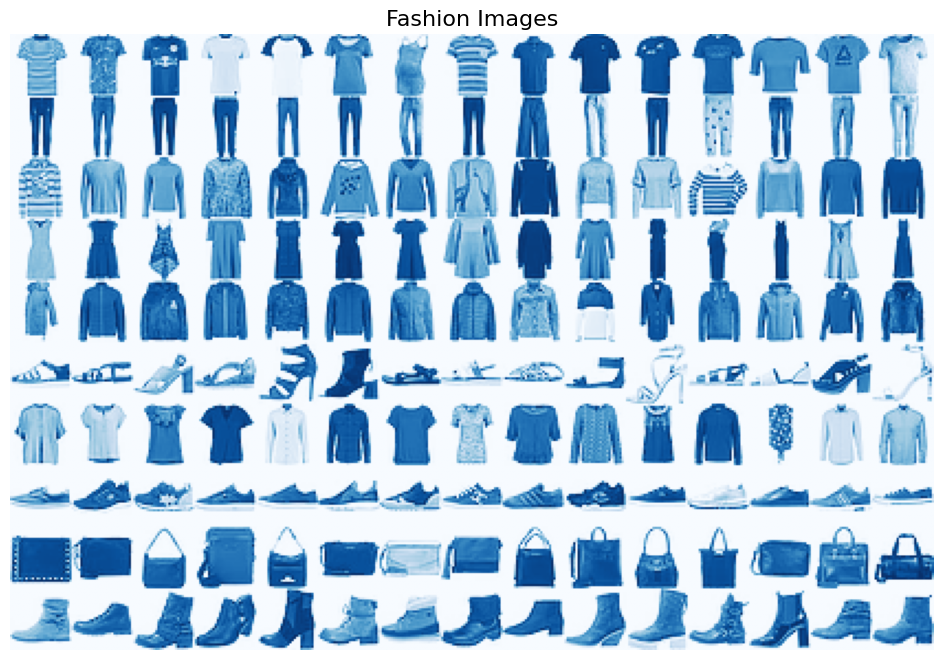

In [ ]:
classes = sorted(np.unique(train_labels).astype(int))
h = w = 28
n_samples = 15

fig, ax = plt.subplots(figsize=(18, 8))
fashion_sample = np.empty(shape=(h * len(classes),
                                 w * n_samples))

for row, label in enumerate(classes):
    label_idx = np.argwhere(train_labels == label).squeeze()
    sample_indices = np.random.choice(label_idx, size=n_samples, replace=False)
    i = row * h
    for col, sample_idx in enumerate(sample_indices):
        j = col * w
        sample = train_images[sample_idx].reshape(h, w)
        fashion_sample[i:i+h, j:j + w] = sample

ax.imshow(fashion_sample, cmap='Blues')
ax.set_title('Fashion Images', fontsize=16)
plt.axis('off')

Набор данных содержит изображения различных предметов одежды: футболки, штаны, кофты, платья, обувь различного вида, etc. Всего $10$ классов. Для меньших временных затрат будем использовать только данные из тестовой части исходного набора данных (всего $10$ тысяч объектов).

In [ ]:
X = test_images.reshape(len(test_images), -1)
y = test_labels

При помощи `train_test_split` разбейте набор данных на тренировочную и тестовую части в соотношении `80:20`. Используйте стратификацию по колонке отклика.

**Примечание:** здесь и далее для воспроизводимости результатов и корректного сравнения результатов экспериментов имеет смысл фиксировать `random_state`.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

Обучите модель `LogisticRegression` со следующими параметрами: `max_iter=2000, tol=0.001` на тренировочных данных. При помощи `f1_score` с параметром `average='weighted'` оцените модель на тестовых данных.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression(max_iter=2000, tol=0.001)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, tol=0.001)

In [ ]:
y_pred = model.predict(X_test)
score = f1_score(y_test, y_pred, average='weighted')
print(f'F1-score на тестовых данных: {score}')

F1-score на тестовых данных: 0.7381424298005053


**Вопрос:** как работает `f1_score` и что показывает данная метрика? Опишите ее плюсы и минусы. Что означает параметр `average='weighted'`? Какие еще бывают параметры, зачем и когда они используются?

**Ваш ответ:**

F1_score - это среднее гармоническое значение точности и полноты, где наилучшее значение оценки F1 равно 1, а наихудшее — 0.  Используется для общей оценки качества классификатора, особенно, когда классы являются несбалансированными.

Формула для оценки $F_1-score$:

$ F_1 = \frac{2 \cdot TP}{2\cdot TP + FP + FN} = 2 \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}} $

Плюсы:

*   F1-score учитывает и точность (precision), и полноту (recall), что обеспечивает сбалансированную оценку;
*   F1-score устойчива к дисбалансу классов.

Минусы:

*   F1-score игнорирует количество истинно-отрицательных результатов (TN), что может быть важно в некоторых задачах;
*   F1-score не является полной метрикой, из-за чего могут быть сложности в интерпретации, поэтому важно брать во внимание и другие метрики (Accuracy, precision, recall и др.).

Параметр average='weighted' вычисляет среднее значение метрики, взвешенное по количеству экземпляров каждого класса (чем больше класс, тем больше вес при расчете F1-score). Используется для учета дисбаланса классов. При этом F1-score может оказаться вне диапазона между precision (точность) и recall (полнота).

Другие параметры:

*   'binary' - параметр, который используется только для бинарной классификации, возвращает метрику только для положительного класса.
*   'micro' -  вычисляет метрики глобально путем подсчета общего количества истинно положительных, ложноотрицательных и ложноположительных результатов.  Используется, когда важно учитывать все предсказания в целом.
*   'macro' - вычисляет метрики для каждого класса отдельно и находит их незвешенное среднее значение, при этом дисбаланс классов не учитывается. Используется, когда все классы одинково важны.
*   'samples' - вычисляет показатели для каждого экземпляра и находит их среднее значение. Используется только для многомерной классификации.







Добавьте к тестовым данным шум при помощи `np.random.normal(X_test, scale)`, где `scale` $\in \{50,100,150,200\}$. Визуально оцените результаты.

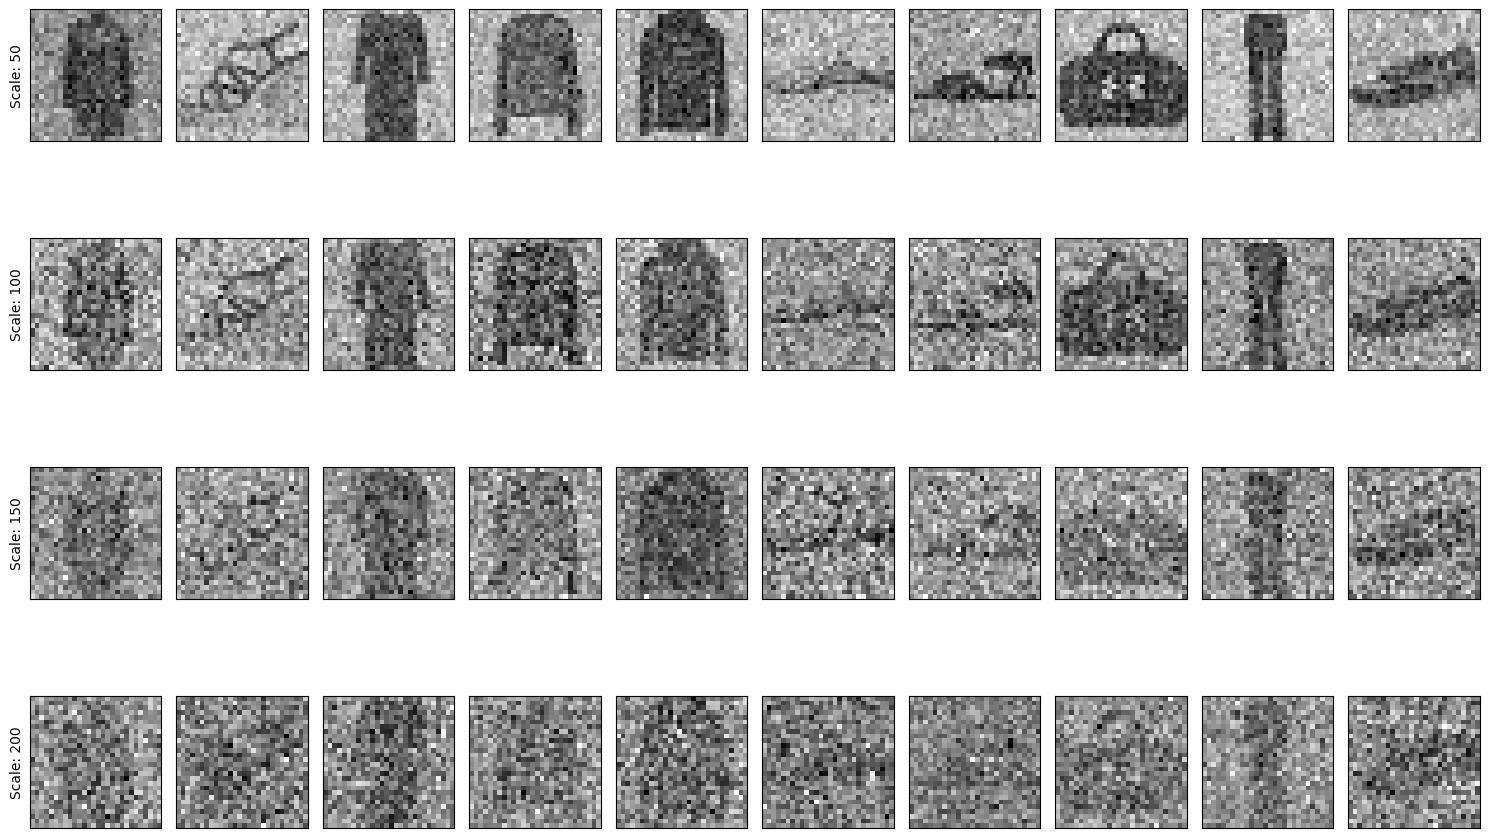

In [ ]:
scales = [50, 100, 150, 200]

fig, axes = plt.subplots(len(scales), 10, figsize=(15, 10), subplot_kw={'xticks': [], 'yticks': []})

for index, scale in enumerate(scales):
    X_test_noisy = X_test + np.random.normal(0, scale, X_test.shape)

    axes[index, 0].set_ylabel(f'Scale: {scale}')

    for i, ax in enumerate(axes[index]):
        ax.imshow(X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)

plt.tight_layout()
plt.show()

**Ваши выводы:** Можно отметить, что начиная с уровня $scale = 100$ становится визуально сложно различать классы объектов, это говорит о том, что система может плохо работать в "неидеальных" условиях.

Произведите предсказания для зашумленных тестовых данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [ ]:
for index, scale in enumerate(scales):
    X_test_noisy = X_test + np.random.normal(0, scale, X_test.shape)
    y_pred_noisy = model.predict(X_test_noisy)
    score_noisy = f1_score(y_test, y_pred_noisy, average='weighted')
    print(f'При scale = {scale} F1-score = {score_noisy}')

При scale = 50 F1-score = 0.5148201856695694
При scale = 100 F1-score = 0.3836919689815162
При scale = 150 F1-score = 0.28895096152528005
При scale = 200 F1-score = 0.24145319947647098


**Ваши выводы:** Можно отметить, что F1-score уменьшается при увеличении искажения изображения и демонстрирует, что на всех рассматриваемых уровнях зашумления модель плохо справляется с задачей (F1-score < 0.55), а значит будет ошибаться в предсказаниях, путать объекты.

Попробуем избавиться от шума при помощи метода главных компонент.

Обучите модель `PCA(explained_variance)` на зашумленных тестовых данных, где `explained_variance` $\in [0.1, 0.9]$ с шагом $0.1$. Уменьшите размерность зашумленных тестовых данных, а затем при помощи `.inverse_transform()` "восстановите" данные до приближенных исходных.

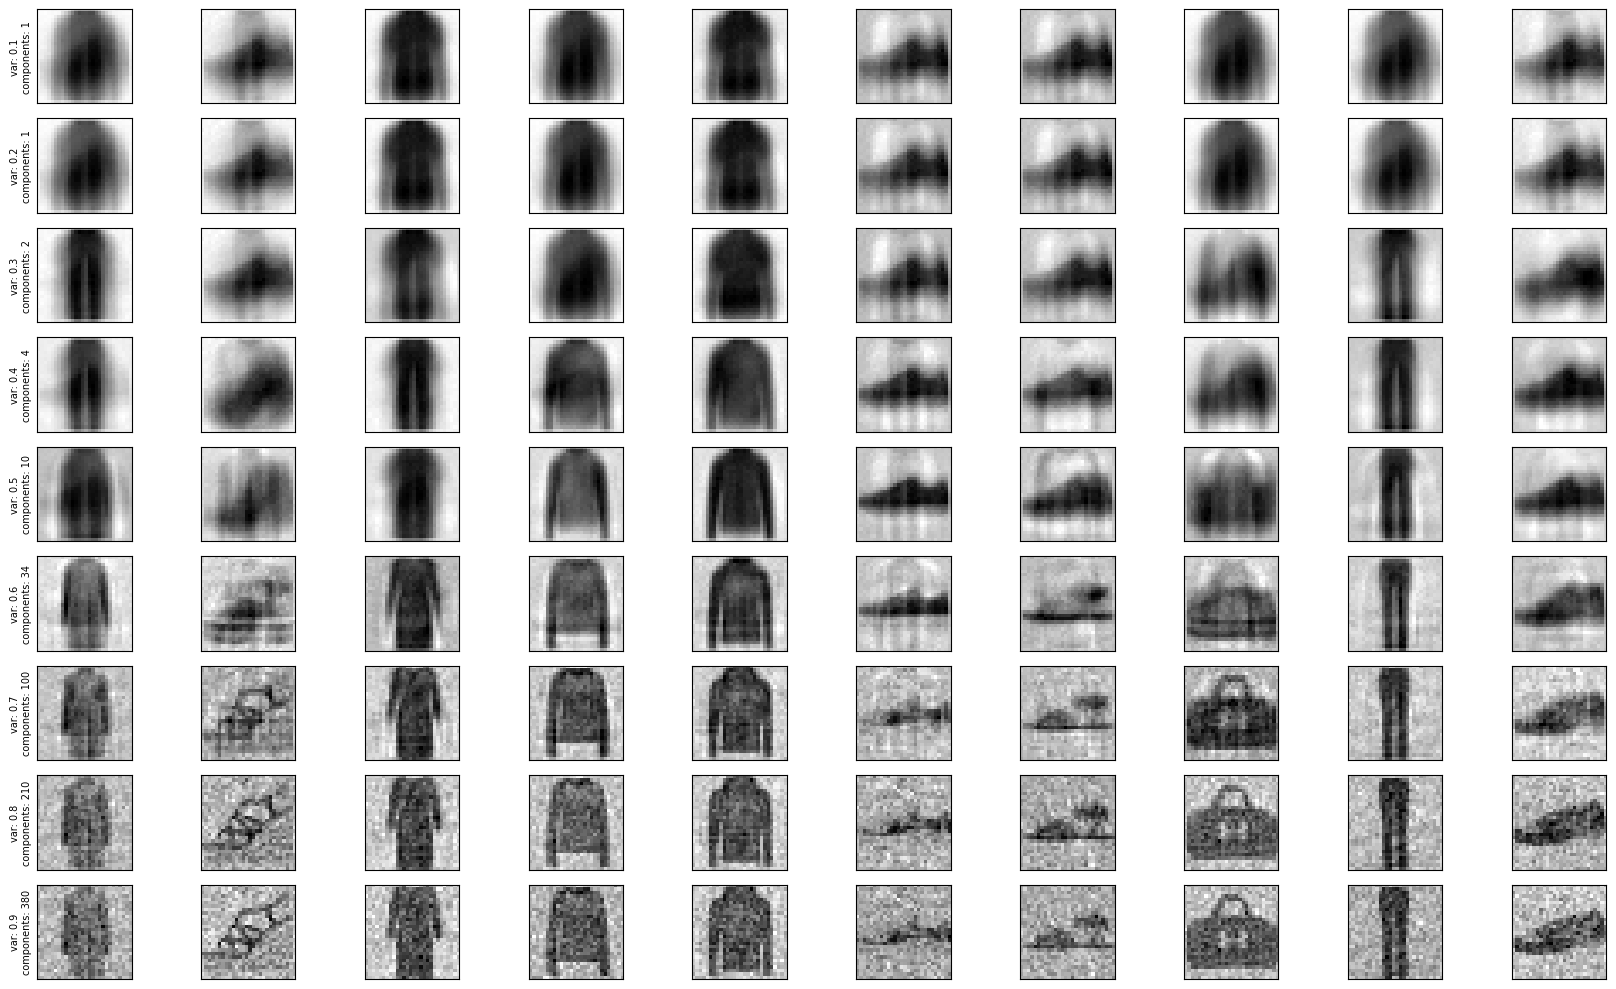

In [ ]:
from sklearn.decomposition import PCA

scale = 50
X_test_noisy = X_test + np.random.normal(0, scale, X_test.shape)
explained_variances = np.arange(0.1, 1.0, 0.1)

fig, axes = plt.subplots(len(explained_variances), 10, figsize=(17, 10), subplot_kw={'xticks': [], 'yticks': []})

for row, explained_variance in enumerate(explained_variances):
    pca = PCA(n_components=explained_variance, random_state=42)
    X_test_pca = pca.fit_transform(X_test_noisy)
    restored_X_test_noisy = pca.inverse_transform(X_test_pca)
    pca.n_components_

    axes[row, 0].set_ylabel(f'var: {explained_variance:.1f}\ncomponents: {pca.n_components_}', fontsize=7)

    for i, ax in enumerate(axes[row]):
        ax.imshow(restored_X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)

plt.tight_layout()
plt.show()

**Ваши выводы:** Можно отметить, что чем больше компонент и, соотвественно, доля объясненной дисперсии, тем изображения становятся более четкими, однако при этом с ростом числа компонент наблюдается значительная часть шума.

Произведите предсказания для очищенных от шума данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [ ]:
X_test_noisy = X_test + np.random.normal(0, scale, X_test.shape)
f_score = []

for explained_variance in explained_variances:
    pca = PCA(n_components=explained_variance, random_state=42)
    X_test_pca = pca.fit_transform(X_test_noisy)
    restored_X_test_noisy = pca.inverse_transform(X_test_pca)
    restored_y_pred_noisy = model.predict(restored_X_test_noisy)
    score_rest = f1_score(y_test, restored_y_pred_noisy, average='weighted')
    f_score.append(score_rest)

for explained_variance, scor in zip(explained_variances, f_score):
    print(f'Объясненная дисперсия = {explained_variance:.1f}, F1-score = {scor}')

Объясненная дисперсия = 0.1, F1-score = 0.0680120041578117
Объясненная дисперсия = 0.2, F1-score = 0.0680120041578117
Объясненная дисперсия = 0.3, F1-score = 0.2047333006284767
Объясненная дисперсия = 0.4, F1-score = 0.4701119420558413
Объясненная дисперсия = 0.5, F1-score = 0.6563440649946227
Объясненная дисперсия = 0.6, F1-score = 0.6964667407318864
Объясненная дисперсия = 0.7, F1-score = 0.6772913217900455
Объясненная дисперсия = 0.8, F1-score = 0.622193938097809
Объясненная дисперсия = 0.9, F1-score = 0.5689396611543194


В качестве результата **НАГЛЯДНО** представьте получаемые значения `f1_score` в зависимости от используемого уровня шума и доли объясненной дисперции (таблицы, графики, диаграммы). Сделайте выводы.

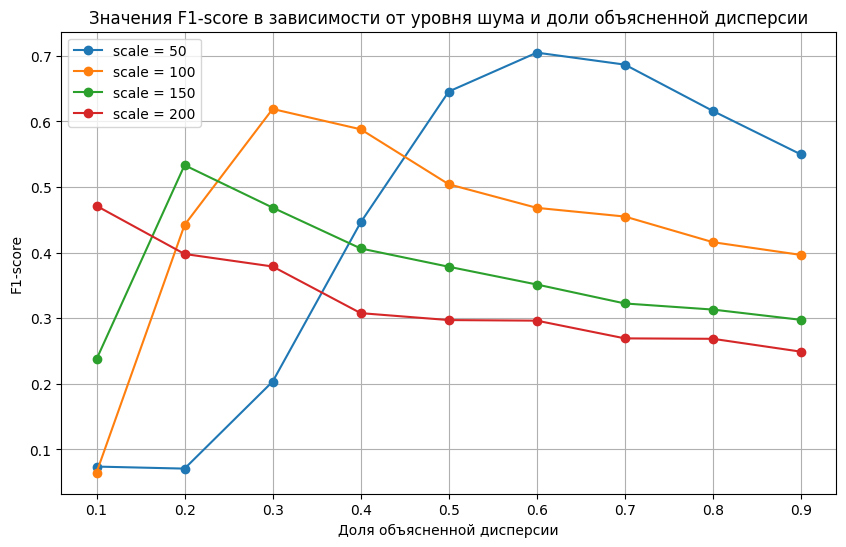

In [ ]:
plt.figure(figsize=(10, 6))

for scale in scales:
    f_score = []

    for explained_variance in explained_variances:
        X_test_noisy = X_test + np.random.normal(0, scale, X_test.shape)
        pca = PCA(n_components=explained_variance, random_state=42)
        X_test_pca = pca.fit_transform(X_test_noisy)
        restored_X_test_noisy = pca.inverse_transform(X_test_pca)
        restored_y_pred_noisy = model.predict(restored_X_test_noisy)
        score_rest = f1_score(y_test, restored_y_pred_noisy, average='weighted')
        f_score.append(score_rest)

    plt.plot(explained_variances, f_score, marker='o', label=f'scale = {scale}')

plt.title('Значения F1-score в зависимости от уровня шума и доли объясненной дисперсии')
plt.xlabel('Доля объясненной дисперсии')
plt.ylabel('F1-score')
plt.xticks(explained_variances)
plt.legend()
plt.grid()
plt.show()

**Ваши выводы:** На основе полученных результатов, можно сделать вывод, что с увеличением уровня шума доля объясненной дисперсии смешается в сторону меньших значений. При сильном зашумлении данных лучшие результаты достигаются при доле объясненной дисперсии на уровне 0.1-0.3. Если же данные не сильно зашумлены, то лучшие результаты достигаются при доле объясненной дисперсии на уровне 0.5-0.7.

# t-SNE

В этом блоке вам предстоит выполнить задания, касающиеся `t-SNE`.

## Теоретическая часть

Напомним, что расстояние Кульбака--Лейблера между двумя распределенями $P = \{p_1, \ldots, p_n\}$, $Q = \{q_1, \ldots, q_n\}$ вычисляется как
$$
\mathbb{KL}(P|Q) = \sum\limits_{i=1}^np_i \log \frac{p_i}{q_i}.
$$

Пусть перплексия равна $k$. Положите $p_{i|j} = 1/k$ для $k$ ближайших соседей точки $j$ за исключением $j$, $p_{j|j} = 0$, как и остальные вероятности. Положите
$$
p_{ij} = \frac{p_{i|j} + p_{j|i}}{2n}.
$$

## Задача 1

Вычислите градиент $\mathbb{KL}$ в случае использования `SNE` и `t-SNE`.

**Ваш ответ:**

**В случае использования SNE**

Симметричный SNE имеет вид:

$
C = \mathbb{KL}(P|Q) = \sum\limits_{i}\sum\limits_{j}p_{ij}\log_2 \frac{p_{ij}}{q_{ji}}.
$

Так, $q_{ij}$ можно определить:

$q_{ij} = \frac{exp(-|| y_i - y_j||^2)}{\sum\limits_{k \neq l}exp(-|| y_k - y_l||^2)}$

Градиент принимает вид:

$\frac{\delta C}{\delta y_i} = 2\sum\limits_{j}(p_{ij} - q_{ij})(y_i - y_j)$

**В случае использования t-SNE**

Во избежании проблемы скученности используется в пространстве низкой размерности t-распределение Стьюдента с одной степенью свободы вместо распределения Гаусса.

Так, $q_{ij}$ определяется следующим образом:

$q_{ij} = \frac{(1 + || y_i - y_j||^2)^{-1}}{\sum\limits_{k \neq l}(1+|| y_k - y_l||^2)^{-1}}$

Градиент принимает вид:

$\frac{\delta C}{\delta y_i} = 4\sum_{j}(p_{ji} - q_{ij})(y_i - y_j)(1+|| y_i - y_j||^2)^{-1}$

## Задача 2.1

В условиях предыдущей задачи самостоятельно реализуйте алгоритмы `SNE` и `t-SNE`. Проведите численные эксперименты для следующего набора данных:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from scipy.optimize import minimize
from sklearn.neighbors import NearestNeighbors
import time


link = 'https://courses.openedu.ru/assets/courseware/v1/6c89dd85d23926d43494d0e4dd968840/asset-v1:ITMOUniversity+INTROMLADVML+fall_2023_ITMO_mag+type@asset+block/94_16.csv'
data = pd.read_csv(link, header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,10.382991,-14.438544,-23.950798,-17.809813,2.480495,-15.743114,-9.112421,-27.390035,-11.955001,18.069910
1,18.987842,-13.071734,15.619164,-11.288528,-11.624820,14.845464,-4.924935,21.207876,-23.703025,4.440474
2,7.426000,-9.236580,-21.139348,6.732592,0.447684,-20.687020,-18.545136,7.758288,18.620790,-3.006755
3,10.718844,-10.240587,-20.604991,4.828083,-0.073568,-23.747055,-17.260869,7.074364,16.996747,-6.796469
4,10.662165,3.871777,12.384108,-1.921321,-1.990254,-5.469310,2.801321,-19.978717,23.414766,-2.654889


In [ ]:
X = data.values
n_samples = X.shape[0]
n_features = X.shape[1]

print(f"Количество строк: {n_samples}")
print(f"Количество столбцов: {n_features}")

Количество строк: 60
Количество столбцов: 10


In [ ]:
# Вычисляем матрицу совместных вероятностей
def compute_symmetric_p(X, perplexity=30.0):
    n = X.shape[0]
    distances = squareform(pdist(X, 'euclidean'))
    # определяем k
    P_cond = np.zeros((n, n))
    k = int(np.round(perplexity))
    if k >= n:
        k = n - 1
    # заполняем условные вероятности
    for j in range(n):
        dist_to_j = distances[j, :].copy()
        dist_to_j[j] = np.inf

        nearest_indices = np.argsort(dist_to_j)[:k]

        P_cond[nearest_indices, j] = 1.0 / k
    # симметризация
    P_joint = (P_cond + P_cond.T) / (2 * n)
    # нормировка
    np.fill_diagonal(P_joint, 0)
    P_joint = P_joint / np.sum(P_joint)

    return P_joint

In [ ]:
class SNE:
    def __init__(self, n_components=2, perplexity=30.0, max_iter=500, learning_rate=10.0, verbose=True, random_state=None):
        self.n_components = n_components
        self.perplexity = perplexity
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.verbose = verbose
        self.random_state = random_state
        self.costs = []

    def fit_transform(self, X):
        if self.random_state is not None:
            np.random.seed(self.random_state)
        n = X.shape[0]
        Y = np.random.randn(n, self.n_components) * 0.01
        # вычисляем P
        P = compute_symmetric_p(X, self.perplexity)
        P = P + 1e-12
        P = P / np.sum(P)

        for iteration in range(self.max_iter):
            # вычисляем расстояния в низком пространстве
            sum_Y = np.sum(np.square(Y), 1)
            D = np.add(np.add(-2 * np.dot(Y, Y.T), sum_Y).T, sum_Y)
            # вычисляем матрицу Q в низкоразмерном пространстве
            Q = np.exp(-D)
            np.fill_diagonal(Q, 0)
            sum_Q = np.sum(Q)
            if sum_Q == 0:
                sum_Q = 1e-12
            Q = Q / sum_Q
            Q = np.maximum(Q, 1e-12)
            # вычисляем KL-дивергенцию
            cost = np.sum(P * np.log2(P / Q))
            self.costs.append(cost)
            # вычисляем градиент
            PQ = P - Q
            grad = 2 * (Y * np.sum(PQ, axis=1)[:, np.newaxis] - np.dot(PQ, Y))
            # обновляем параметры
            Y = Y - self.learning_rate * grad
            # постепенно уменьшаем learning rate для улучшения сходимости
            if iteration < 100:
                self.learning_rate *= 0.99
            else:
                self.learning_rate *= 0.995

            if self.verbose and iteration % 100 == 0:
                grad_norm = np.linalg.norm(grad)
                print(f"Iteration {iteration:4d}: Cost: {cost:.6f}, "
                      f"Grad norm: {grad_norm:.6f}, LR: {self.learning_rate:.6f}")
        return Y

In [ ]:
class tSNE:
    def __init__(self, n_components=2, perplexity=30.0, max_iter=500, learning_rate=10.0, verbose=True, random_state=None):
        self.n_components = n_components
        self.perplexity = perplexity
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.verbose = verbose
        self.random_state = random_state
        self.costs = []

    def fit_transform(self, X):
        if self.random_state is not None:
            np.random.seed(self.random_state)

        n = X.shape[0]
        Y = np.random.randn(n, self.n_components) * 0.01
        # вычисляем P
        P = compute_symmetric_p(X, self.perplexity)
        P = P + 1e-12
        P = P / np.sum(P)

        for iteration in range(self.max_iter):
            # вычисляем расстояния в низком пространстве
            sum_Y = np.sum(np.square(Y), 1)
            D = np.add(np.add(-2 * np.dot(Y, Y.T), sum_Y).T, sum_Y)
            # вычисляем матрицу Q в низкоразмерном пространстве
            Q = 1.0 / (1.0 + D)
            np.fill_diagonal(Q, 0)

            sum_Q = np.sum(Q)
            if sum_Q == 0:
                sum_Q = 1e-12
            Q = Q / sum_Q
            Q = np.maximum(Q, 1e-12)
            # вычисляем KL-дивергенцию
            cost = np.sum(P * np.log2(P / Q))
            self.costs.append(cost)
            # вычисляем градиент
            PQ = P - Q
            W = PQ / (1.0 + D)
            np.fill_diagonal(W, 0)

            grad = 4 * (Y * np.sum(W, axis=1)[:, np.newaxis] - np.dot(W, Y))
            # обновляем параметры
            Y = Y - self.learning_rate * grad
            # постепенно уменьшаем learning rate для улучшения сходимости
            if iteration < 100:
                self.learning_rate *= 0.99
            else:
                self.learning_rate *= 0.995

            if self.verbose and iteration % 100 == 0:
                grad_norm = np.linalg.norm(grad)
                print(f"Iteration {iteration:4d}: Cost: {cost:.6f}, "
                      f"Grad norm: {grad_norm:.6f}, LR: {self.learning_rate:.6f}")

        return Y

**НАГЛЯДНО** представьте получаемые результаты (визуализации, время работы, анимация, etc) в зависимости от используемого метода (`SNE`/`t-SNE`) и значения перплексии. Сделайте выводы.


Perplexity = 5

SNE
Iteration    0: Cost: 3.200772, Grad norm: 0.001749, LR: 9.900000
Iteration  100: Cost: 0.682939, Grad norm: 0.015683, LR: 3.642022
Iteration  200: Cost: 0.593591, Grad norm: 0.006378, LR: 2.206229

t-SNE
Iteration    0: Cost: 3.200772, Grad norm: 0.003495, LR: 9.900000
Iteration  100: Cost: 1.126041, Grad norm: 0.019177, LR: 3.642022
Iteration  200: Cost: 1.022784, Grad norm: 0.013202, LR: 2.206229

Perplexity = 15

SNE
Iteration    0: Cost: 1.911315, Grad norm: 0.000782, LR: 9.900000
Iteration  100: Cost: 0.199779, Grad norm: 0.000521, LR: 3.642022
Iteration  200: Cost: 0.199707, Grad norm: 0.000151, LR: 2.206229

t-SNE
Iteration    0: Cost: 1.911315, Grad norm: 0.001563, LR: 9.900000
Iteration  100: Cost: 0.356127, Grad norm: 0.010347, LR: 3.642022
Iteration  200: Cost: 0.326195, Grad norm: 0.006945, LR: 2.206229

Perplexity = 30

SNE
Iteration    0: Cost: 0.710206, Grad norm: 0.000861, LR: 9.900000
Iteration  100: Cost: 0.174174, Grad norm: 0.002572, LR: 3.6420

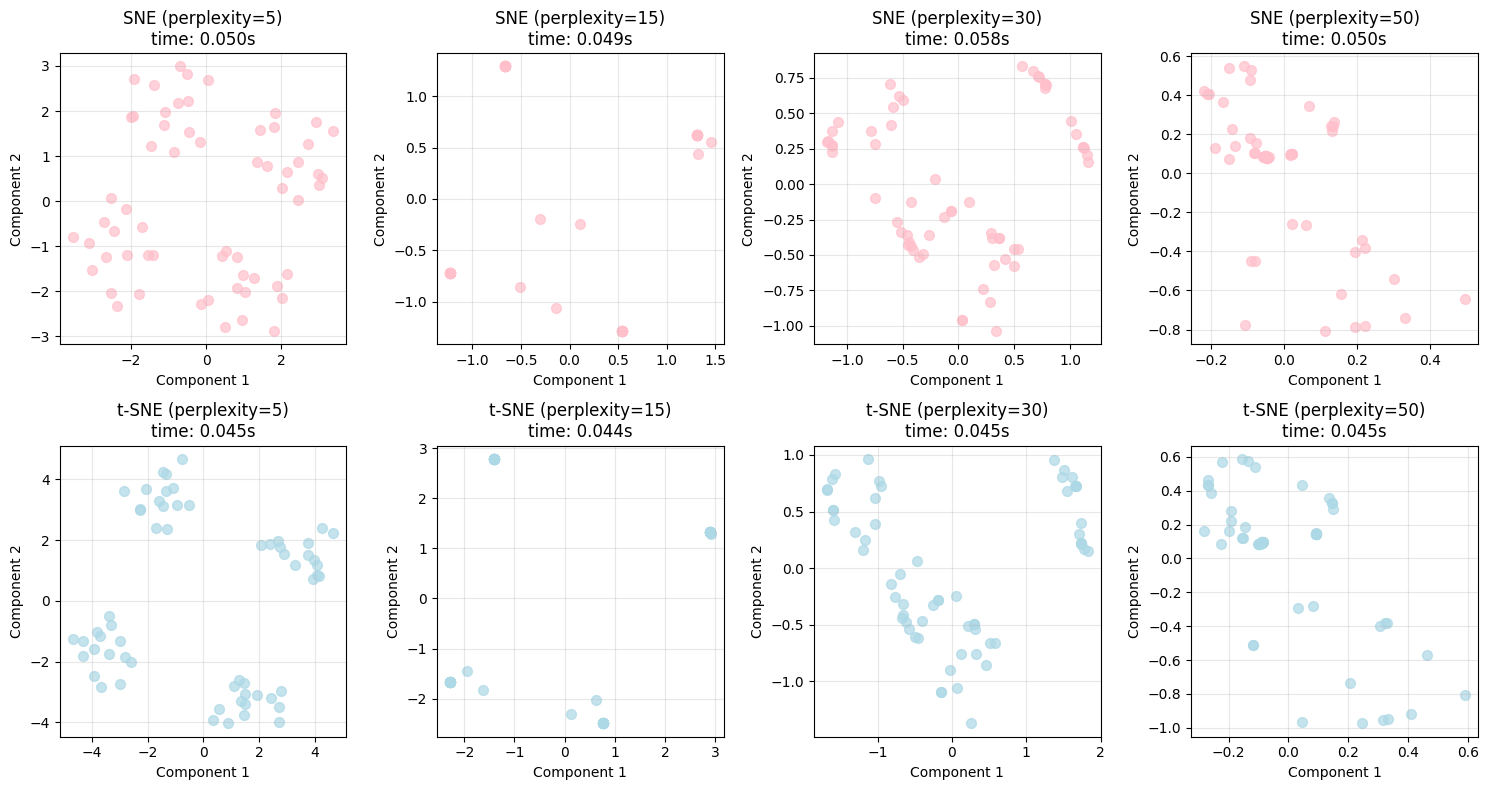

In [ ]:
perplexities = [5, 15, 30, 50]
results = {'SNE': {}, 't-SNE': {}}
times = {'SNE': {}, 't-SNE': {}}
objects = {'SNE': {}, 't-SNE': {}}

fig, axes = plt.subplots(2, len(perplexities), figsize=(15, 8))

for idx, perplexity in enumerate(perplexities):
    print(f"\nPerplexity = {perplexity}")

    # SNE
    print("\nSNE")
    start_time = time.time()
    sne = SNE(perplexity=perplexity, max_iter=300, learning_rate=10.0, random_state=42)
    Y_sne = sne.fit_transform(X)
    times['SNE'][perplexity] = time.time() - start_time
    results['SNE'][perplexity] = Y_sne
    objects['SNE'][perplexity] = sne

    # t-SNE
    print("\nt-SNE")
    start_time = time.time()
    tsne = tSNE(perplexity=perplexity, max_iter=300, learning_rate=10.0,  random_state=42)
    Y_tsne = tsne.fit_transform(X)
    times['t-SNE'][perplexity] = time.time() - start_time
    results['t-SNE'][perplexity] = Y_tsne
    objects['t-SNE'][perplexity] = tsne

    # Визуализация SNE
    ax = axes[0, idx]
    ax.scatter(Y_sne[:, 0], Y_sne[:, 1], alpha=0.7, s=50, color='pink')
    ax.set_title(f'SNE (perplexity={perplexity})\ntime: {times["SNE"][perplexity]:.3f}s')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.grid(True, alpha=0.3)

    # Визуализация t-SNE
    ax = axes[1, idx]
    ax.scatter(Y_tsne[:, 0], Y_tsne[:, 1], alpha=0.7, s=50, color='lightblue')
    ax.set_title(f't-SNE (perplexity={perplexity})\ntime: {times["t-SNE"][perplexity]:.3f}s')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

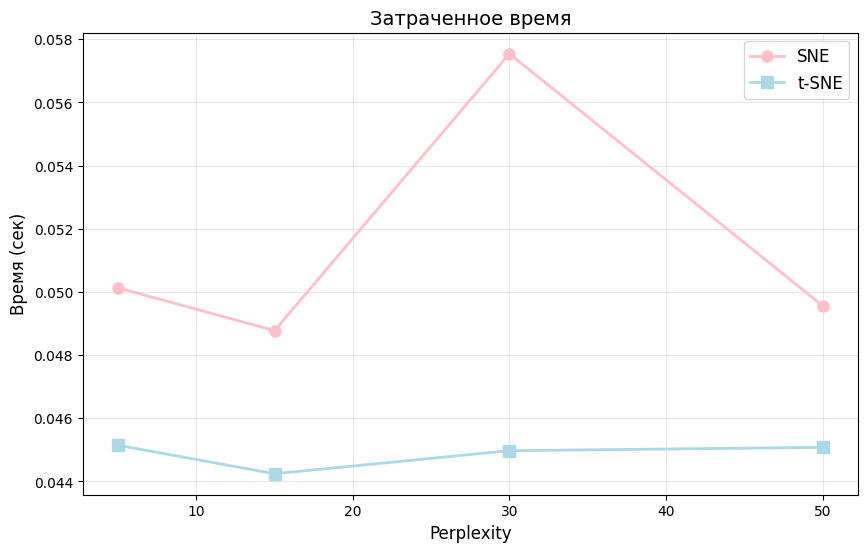

In [ ]:
# Сравнение времени
plt.figure(figsize=(10, 6))
plt.plot(perplexities, [times['SNE'][p] for p in perplexities], 'o-',
         label='SNE', linewidth=2, markersize=8, color='pink')
plt.plot(perplexities, [times['t-SNE'][p] for p in perplexities], 's-',
         label='t-SNE', linewidth=2, markersize=8, color='lightblue')
plt.xlabel('Perplexity', fontsize=12)
plt.ylabel('Время (сек)', fontsize=12)
plt.title('Затраченное время', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

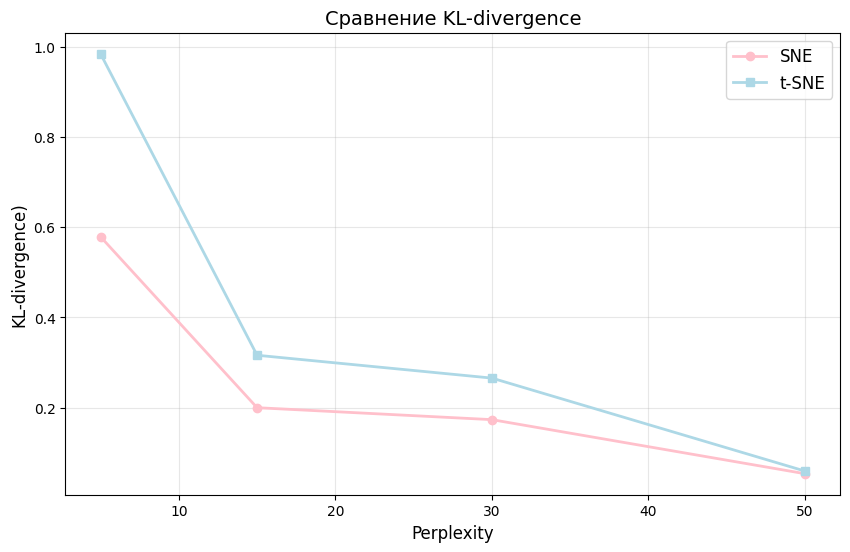

In [ ]:
# Сравнение финальных стоимостей
plt.figure(figsize=(10, 6))
sne_costs = [objects['SNE'][p].costs[-1] if objects['SNE'][p].costs else np.nan
             for p in perplexities]
tsne_costs = [objects['t-SNE'][p].costs[-1] if objects['t-SNE'][p].costs else np.nan
              for p in perplexities]

plt.plot(perplexities, sne_costs, 'o-', label='SNE', linewidth=2, color = 'pink')
plt.plot(perplexities, tsne_costs, 's-', label='t-SNE', linewidth=2, color = 'lightblue')
plt.xlabel('Perplexity', fontsize=12)
plt.ylabel('KL-divergence)', fontsize=12)
plt.title('Сравнение KL-divergence', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

**Вывод:**

**Визуализация:** На основе представленных графиков можно отметить, что метод t-SNE лучше выделяет кластеры, границы между выделенными группами являются более четкими в сравнение с графиками, полученными при применении метода SNE. На данных графиках (SNE) точки более скученные, стремятся как бы к центру (особенно заметно при perplexity 30-50).

**Зависмость от perplexity:** Были рассмотрены случаи при значениях перплексии = [5, 15, 30, 50].
Perplexity можно неформально интерпретировать как «эффективное количество соседей».
При маленьких значениях perplexity алгоритм фокусируется на очень близких соседях, в связи с чем образуются маленькие кластеры.
Большие же значения perplexity учитывают более глобальные структуры, кластеры могут сливаться, более "глобальная" картина получается.

Чтобы выбрать оптимальное значение perplexit, важно ориентироваться на размер датасета и визуальное представление.

Для текущего датасета (размер 60x10) оптимально будет значения perplexity 5-15, что обеспечивают баланс между локальной и глобальной структурой.На графиках ожно отметить четкое выделение 4 кластеров.

**Время:**
Можно отметить, что t-SNE выполяется быстрее SNE при всех рассмотренных значениях перплексии, а также t-SNE демонстрирует более стабильное время выполнения.

**KL-дивергенция:**

Из графика видно, что SNE достигает меньших значений KL-дивергенции, но t-SNE демонстрирует лучшую визуализацию. Это связано с тем, что SNE использует гауссовское распределение, а t-SNE t-распределение Стюдента, которое решает проблему скученности ценой увеличения сost.

**Замечание:** В качестве способа минимизации функции потерь можно использовать либо самостоятельно реализованный градиентный спуск, либо некоторую библиотечную оптимизацию, использующую вычисленные вами в предыдущей задаче градиенты функций потерь. Например, на основе `scipy.optimize.minimize`.

In [ ]:
# @title Пример использования scipy.optimize.minimize
import numpy as np
from scipy.optimize import minimize

# Пусть минимизируемая функция имеет вид $(x-2)^2 + (y+1)^2$
# Начальная точка
x0 = np.array([5,8])

# Для вычисления точки минимума в функцию minimize подается
# cама минимизируемая функция и ее градиент
def f_and_grad(point):
  x,y = point
  f = (x-2)**2 + (y+1)**2
  grad = np.array([2*(x-2), 2*(y+1)])
  return f, grad


# Чтобы функция minimize использовала именно наш градиент
# устанавливаем соответствующий параметр jac=True
minimize(f_and_grad, x0, jac=True)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 6.2960960997952e-29
        x: [ 2.000e+00 -1.000e+00]
      nit: 4
      jac: [ 1.510e-14 -4.885e-15]
 hess_inv: [[ 9.500e-01 -1.500e-01]
            [-1.500e-01  5.500e-01]]
     nfev: 5
     njev: 5

## Задача 2.2

Используя набор данных из Задачи 2.1 и [библиотечную реализацию t-SNE](https://opentsne.readthedocs.io/en/latest/api/sklearn.html), произведите численные эксперименты. Обратите особое внимание на следующие параметры: `perplexity, early_exaggeration, exaggeration, initialization, dof`. Сравните время работы и получаемые результаты с результатами Задачи 2.1. Сделайте выводы.

In [ ]:
!pip install -q openTSNE
from openTSNE import TSNE as openTSNE

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 37.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import time
from tqdm.notebook import tqdm
from datetime import datetime
from openTSNE import TSNE as openTSNE

link = 'https://courses.openedu.ru/assets/courseware/v1/6c89dd85d23926d43494d0e4dd968840/asset-v1:ITMOUniversity+INTROMLADVML+fall_2023_ITMO_mag+type@asset+block/94_16.csv'
data = pd.read_csv(link, header = None)

X = data.values
n_samples = X.shape[0]
n_features = X.shape[1]

print(f"Количество строк: {n_samples}")
print(f"Количество столбцов: {n_features}")

Количество строк: 60
Количество столбцов: 10


In [ ]:
# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Параметры для экспериментов
perplexities = [5, 15, 30, 50]
early_exaggerations = [4, 12, 24, 50]
exaggerations = [1, 4, 12, 24]
initializations = ['random', 'pca']
dof_values = [0.5, 1.0, 2.0]

results_library = {}
times_library = {}

In [ ]:
# Рerplexity
results_library['perplexity'] = {}
times_library['perplexity'] = {}

for perplexity in perplexities:
    start_time = time.time()

    tsne = TSNE(n_components=2, perplexity=perplexity, max_iter=300, random_state=42, init ='random', learning_rate='auto')

    Y = tsne.fit_transform(X_scaled)
    elapsed_time = time.time() - start_time

    results_library['perplexity'][perplexity] = Y
    times_library['perplexity'][perplexity] = elapsed_time

# Еarly_exaggeration
results_library['early_exaggeration'] = {}
times_library['early_exaggeration'] = {}

for early_exagg in early_exaggerations:
    start_time = time.time()

    tsne = TSNE(n_components=2, perplexity=30, early_exaggeration=early_exagg, max_iter=300, random_state=42, init ='random', learning_rate='auto')

    Y = tsne.fit_transform(X_scaled)
    elapsed_time = time.time() - start_time

    results_library['early_exaggeration'][early_exagg] = Y
    times_library['early_exaggeration'][early_exagg] = elapsed_time

# Initialization
results_library['initialization'] = {}
times_library['initialization'] = {}

for init in initializations:
    start_time = time.time()

    tsne = TSNE(n_components=2, perplexity=30, max_iter=300, random_state=42, init=init, learning_rate='auto')

    Y = tsne.fit_transform(X_scaled)
    elapsed_time = time.time() - start_time

    results_library['initialization'][init] = Y
    times_library['initialization'][init] = elapsed_time

In [ ]:
# Exaggeration
results_library['exaggeration'] = {}
times_library['exaggeration'] = {}

for exagg in exaggerations:
    start_time = time.time()

    tsne = openTSNE(n_components=2, perplexity=19, n_iter=300, random_state=42, initialization ='random', learning_rate='auto', exaggeration = exagg)

    Y = tsne.fit(X_scaled)
    elapsed_time = time.time() - start_time

    results_library['exaggeration'][exagg] = Y
    times_library['exaggeration'][exagg] = elapsed_time

In [ ]:
# dof
results_library['dof'] = {}
times_library['dof'] = {}

for dof in dof_values:
    start_time = time.time()

    tsne = openTSNE(n_components=2, perplexity=19, n_iter=300, random_state=42, initialization ='random', learning_rate='auto', dof=dof)

    Y = tsne.fit(X_scaled)
    elapsed_time = time.time() - start_time

    results_library['dof'][dof] = Y
    times_library['dof'][dof] = elapsed_time

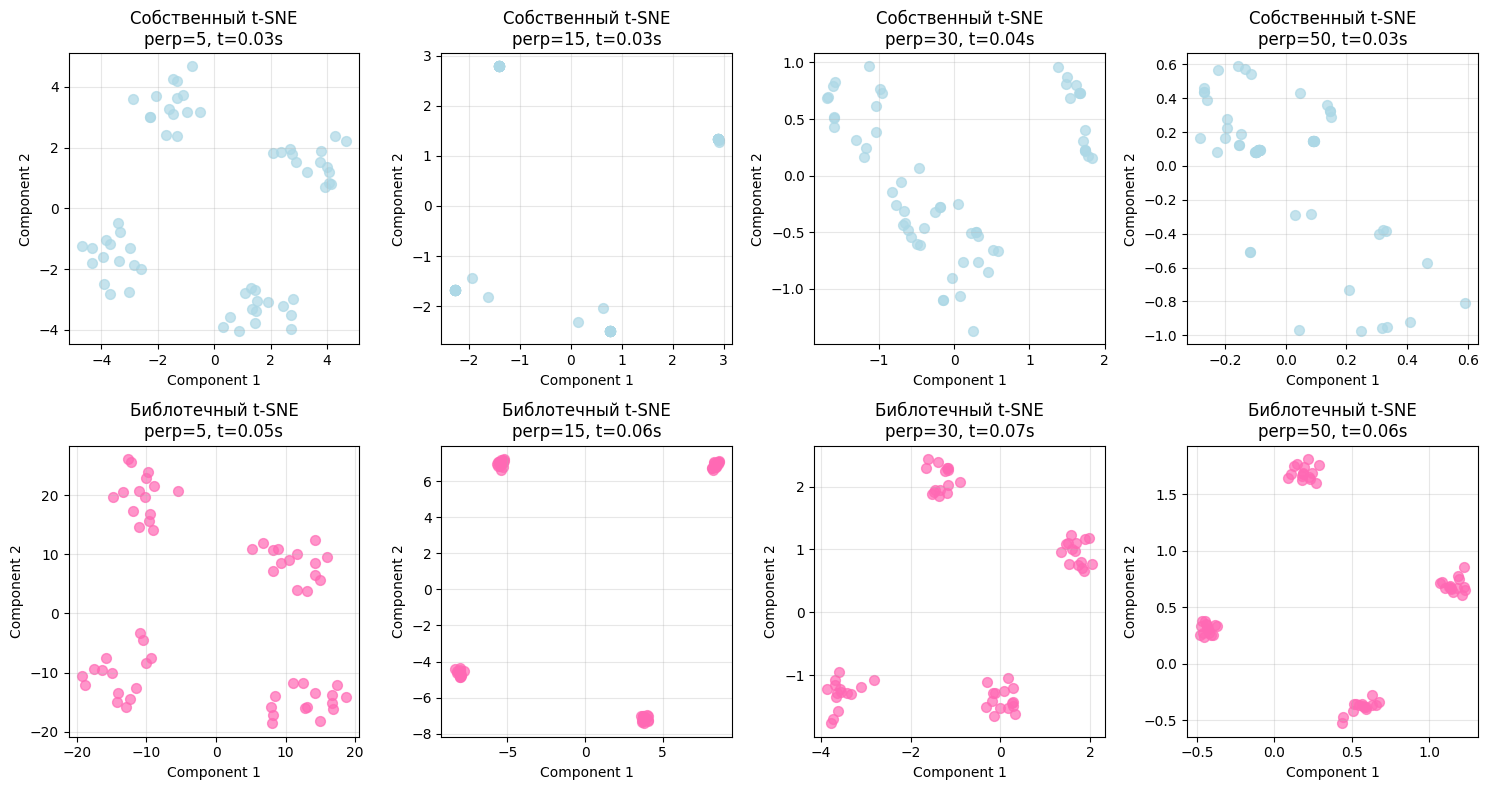

In [ ]:
# Визуализация perplexity
fig, axes = plt.subplots(2, len(perplexities), figsize=(15, 8))

for idx, perplexity in enumerate(perplexities):
    # Самостоятельно реализованный t-SNE
    ax = axes[0, idx]
    Y_custom = results['t-SNE'][perplexity]
    custom_time = times["t-SNE"][perplexity]
    ax.scatter(Y_custom[:, 0], Y_custom[:, 1], alpha=0.7, s=50, color='lightblue')
    ax.set_title(f'Собственный t-SNE\nperp={perplexity}, t={custom_time:.2f}s')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.grid(True, alpha=0.3)

    # Библиотечный t-SNE
    ax = axes[1, idx]
    Y_lib = results_library['perplexity'][perplexity]
    lib_time = times_library['perplexity'][perplexity]
    ax.scatter(Y_lib[:, 0], Y_lib[:, 1], alpha=0.7, s=50, color='hotpink')
    ax.set_title(f'Библотечный t-SNE\nperp={perplexity}, t={lib_time:.2f}s')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Исходя из полученных результатов, можно отметить, что библиотечная реализация t-SNE демонстрирует более качественную визуализацию. Отмечается еще более четкое разделение кластеров, нет скученности точек в центре (что, например, отмечается при сосбтвенной реализации t-SNE, perp 30-50).

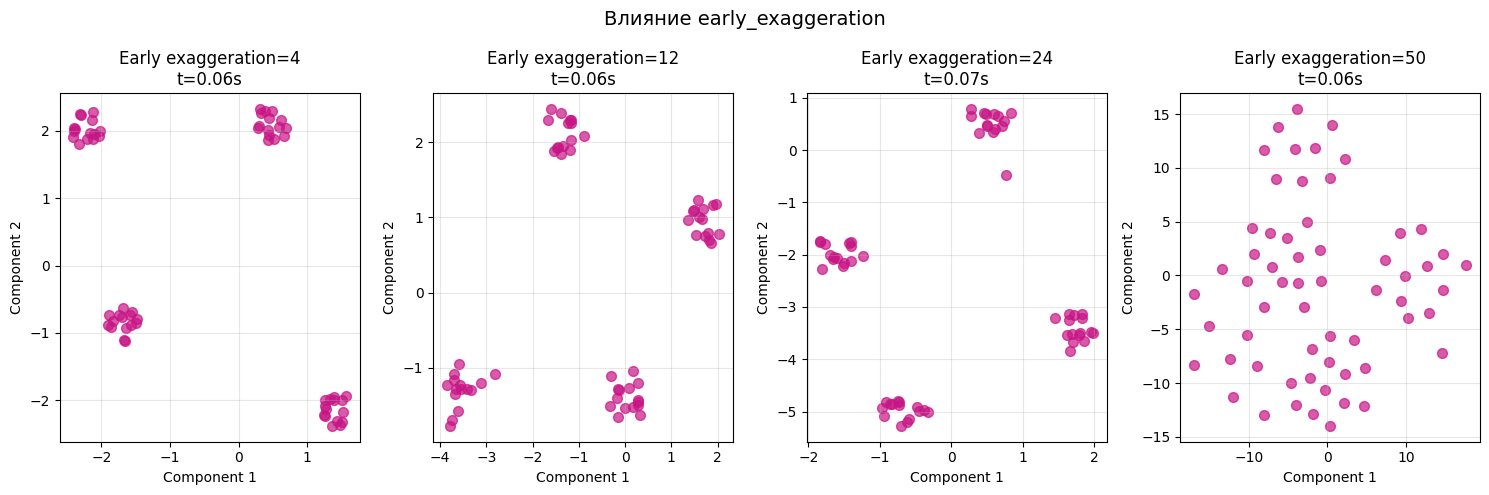

In [ ]:
# Визуализация early_exaggeration
fig, axes = plt.subplots(1, len(early_exaggerations), figsize=(15, 5))

for idx, early_exagg in enumerate(early_exaggerations):
    ax = axes[idx]
    Y = results_library['early_exaggeration'][early_exagg]
    t = times_library['early_exaggeration'][early_exagg]

    ax.scatter(Y[:, 0], Y[:, 1], alpha=0.7, s=50, color='mediumvioletred')
    ax.set_title(f'Early exaggeration={early_exagg}\nt={t:.2f}s')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.grid(True, alpha=0.3)

plt.suptitle('Влияние early_exaggeration', fontsize=14)
plt.tight_layout()
plt.show()

Параметр early_exaggeration – коэффициент преувеличения, используемый на ранней стадии преувеличения. Определяет, насколько «сжатыми» будут естественные кластеры из исходного пространства в проекции и сколько свободного пространства будет между ними.
Как можно отметить на графиках, чем выше его значение, тем больше расстояние между кластерами в проекции.

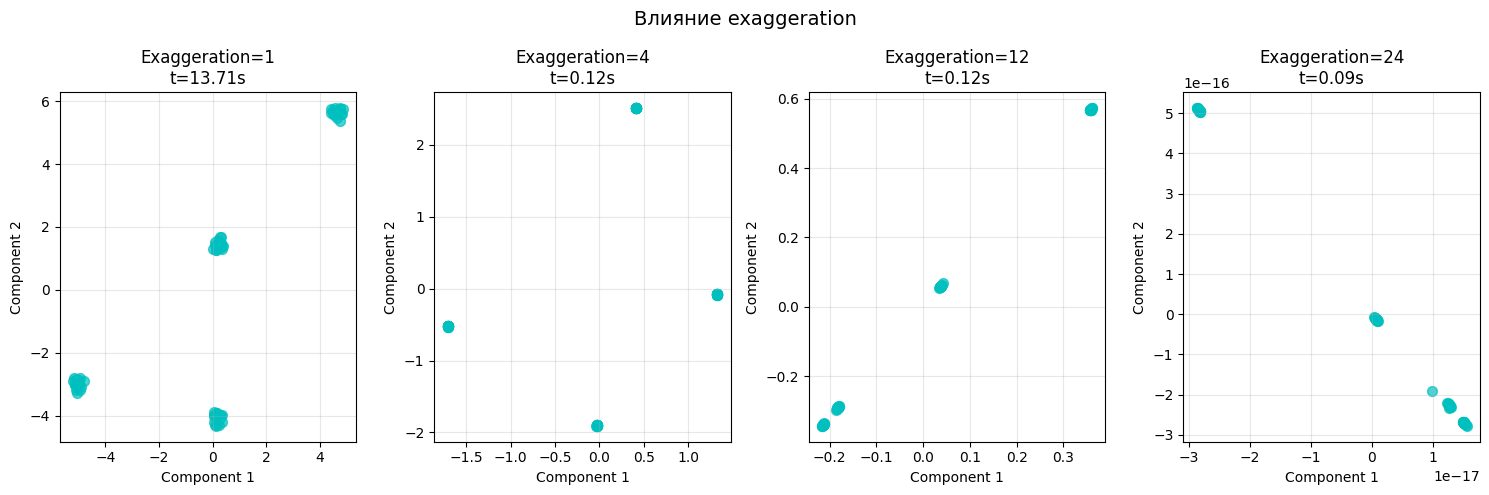

In [ ]:
# Визуализация exaggeration
fig, axes = plt.subplots(1, len(exaggerations), figsize=(15, 5))

for idx, exagg in enumerate(exaggerations):
    ax = axes[idx]
    Y = results_library['exaggeration'][exagg]
    t = times_library['exaggeration'][exagg]

    ax.scatter(Y[:, 0], Y[:, 1], alpha=0.7, s=50, color='c')
    ax.set_title(f'Exaggeration={exagg}\nt={t:.2f}s')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.grid(True, alpha=0.3)

plt.suptitle('Влияние exaggeration', fontsize=14)
plt.tight_layout()
plt.show()

Параметр exaggeration (openTSNE) – коэффициент преувеличения, используемый на этапе обычной оптимизации. Это позволяет формировать более плотно упакованные кластеры и полезно для больших наборов данных.

Чем выше значение, тем кластеры будут более плотными и четко разделенными.

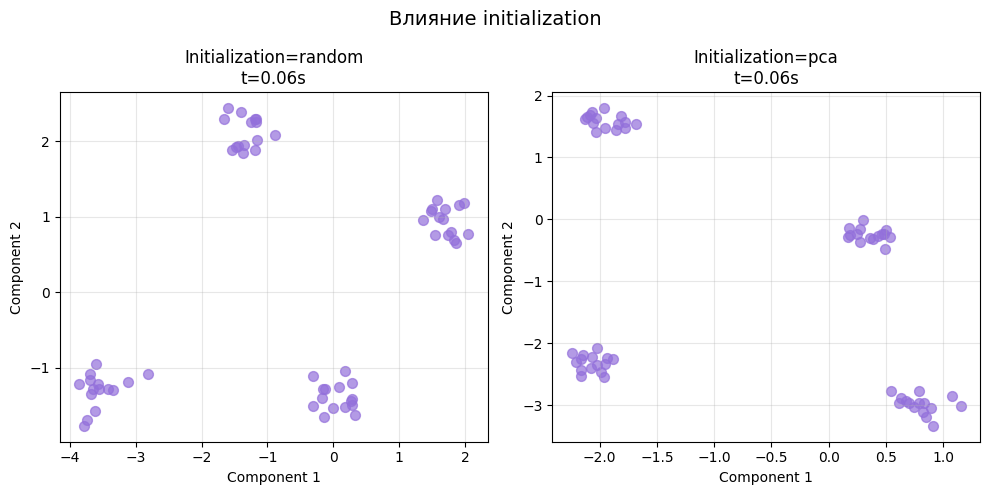

In [ ]:
# Визуализация initialization
fig, axes = plt.subplots(1, len(initializations), figsize=(10, 5))

for idx, init in enumerate(initializations):
    ax = axes[idx]
    Y = results_library['initialization'][init]
    t = times_library['initialization'][init]

    ax.scatter(Y[:, 0], Y[:, 1], alpha=0.7, s=50, color='mediumpurple')
    ax.set_title(f'Initialization={init}\nt={t:.2f}s')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.grid(True, alpha=0.3)

plt.suptitle('Влияние initialization', fontsize=14)
plt.tight_layout()
plt.show()

Парметр initialization - начальная инициализация.

При init="random" точки инициализируются случайно. Результат может зависеть от random_state, и сходимость может быть медленной.

При init="pca" точки инициализируются с помощью PCA. Инициализация методом PCA не может использоваться с предварительно вычисленными расстояниями и обычно более устойчива в глобальном отношении, чем случайная инициализация.

Можно отметить, что при применении init="pca" получились более четкие кластеры.

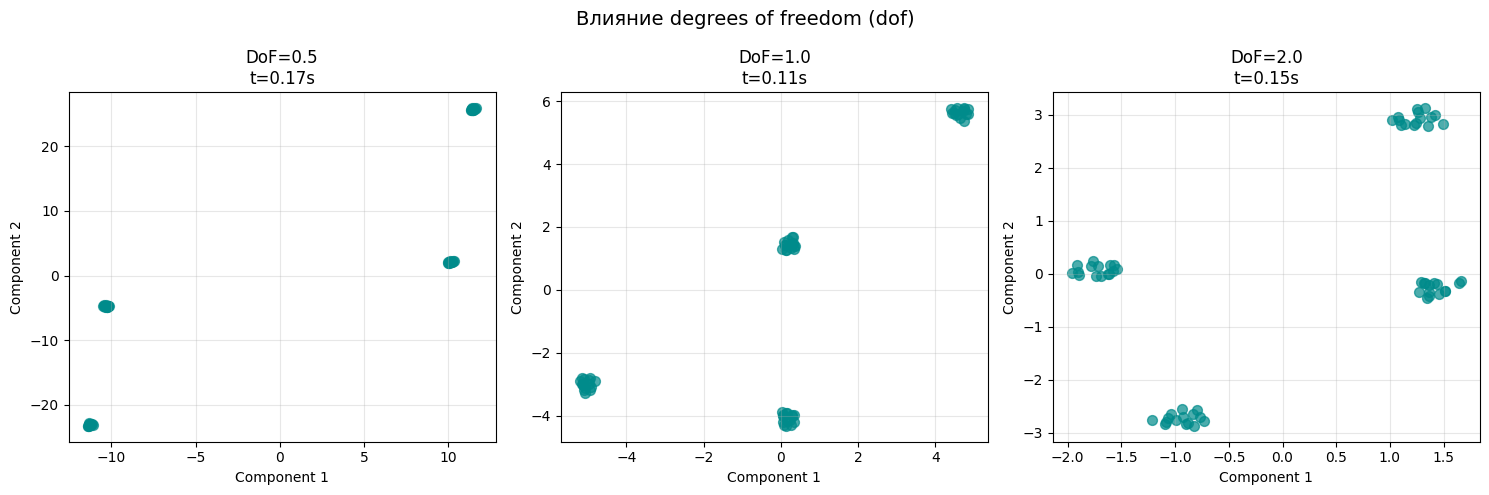

In [ ]:
# Визуализация dof
fig, axes = plt.subplots(1, len(dof_values), figsize=(15, 5))
for idx, dof in enumerate(dof_values):
        ax = axes[idx]
        Y = results_library['dof'][dof]
        t = times_library['dof'][dof]

        ax.scatter(Y[:, 0], Y[:, 1], alpha=0.7, s=50, color='darkcyan')
        ax.set_title(f'DoF={dof}\nt={t:.2f}s')
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        ax.grid(True, alpha=0.3)

plt.suptitle('Влияние degrees of freedom (dof)', fontsize=14)
plt.tight_layout()
plt.show()

Параметр dof (openTSNE) – степени свободы, как выявляют более "тонкую" кластерную структуру в визуализациях t-SNE.

Небольшие значения усиливают отталкивание между дальними точками.

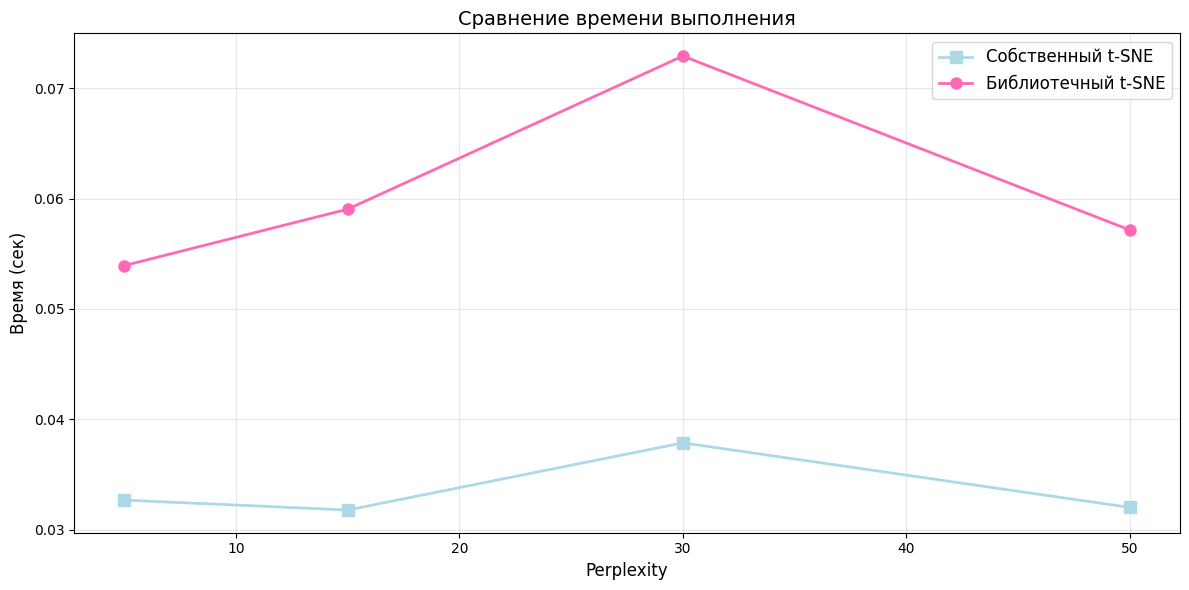

In [ ]:
# Сравнение времени выполнения
plt.figure(figsize=(12, 6))

# Время самостоятельно реализованного t-SNE
custom_times = [times['t-SNE'][p] for p in perplexities]

# Время библиотечного t-SNE
lib_times = [times_library['perplexity'][p] for p in perplexities]

plt.plot(perplexities, custom_times, 's-', label='Собственный t-SNE', linewidth=2, markersize=8, color='lightblue')
plt.plot(perplexities, lib_times, 'o-', label='Библиотечный t-SNE', linewidth=2, markersize=8, color='hotpink')

plt.xlabel('Perplexity', fontsize=12)
plt.ylabel('Время (сек)', fontsize=12)
plt.title('Сравнение времени выполнения', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

На представленном графике можно заметить, что время выполнения при разных значениях перплексии в 2-3 раза выше у библиотечной реализации t-SNE.

Несмотря на то, что качество разбиения на кластеры лучше у библиотечной реализации, она оказалась медленнее.

На самом деле, такой результат связан с маленьким датасетом (60x10), собственная реализация быстрее из-за простоты, в то время как библиотечная имеет накладные расходы (использует бинарный поиск, early_exaggeration, сложный оптимизатор), которые заметны на малых данных.

Поэтому имеет смысл провести эксперименты на более больших датасетах.

## Задача 3

Проверьте свои выводы о влиянии рассмотренных в Задаче 2.2 параметров на результат, используя более объемный, как с точки зрения количества объектов, так и с точки зрения количества признаков, датасет на свой выбор.

Для выполнения данного задания возьмем набор данных digits из библиотеки sklearn, где каждая точка данных представляет собой изображение цифры размером 8x8 пикселей.

Размер датасета: 1797x64

Ссылка с описанием датасета: https://scikit-learn.org/0.15/modules/generated/sklearn.datasets.load_digits.html

Data shape: (60, 10)
Target shape: (1797,)


<Figure size 640x480 with 0 Axes>

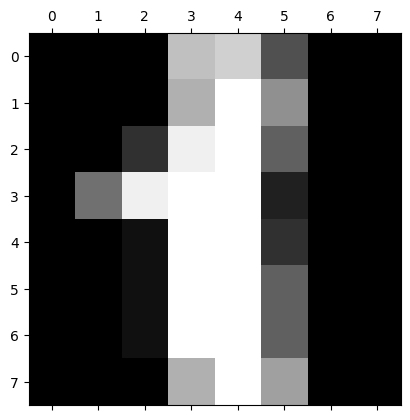

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import time
from tqdm.notebook import tqdm
from datetime import datetime
from openTSNE import TSNE as openTSNE
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()

X_d = digits.data
y_d = digits.target

print(f"Data shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Визуализация
plt.gray()
plt.matshow(digits.images[1])
plt.show()


In [ ]:
# Масштабирование
scaler = StandardScaler()
X_d_scaled = scaler.fit_transform(X_d)

Собственная реализация t-SNE на датасете digits
Iteration    0: Cost: 5.527222, Grad norm: 0.000426, LR: 9.900000
Iteration  100: Cost: 5.526987, Grad norm: 0.000676, LR: 3.642022
Iteration  200: Cost: 5.526694, Grad norm: 0.001025, LR: 2.206229
Время выполнения: 58.83 сек

Библиотечная реализация t-SNE на датасете digits


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Время выполнения: 3.25 сек
KL divergence: 1.4221


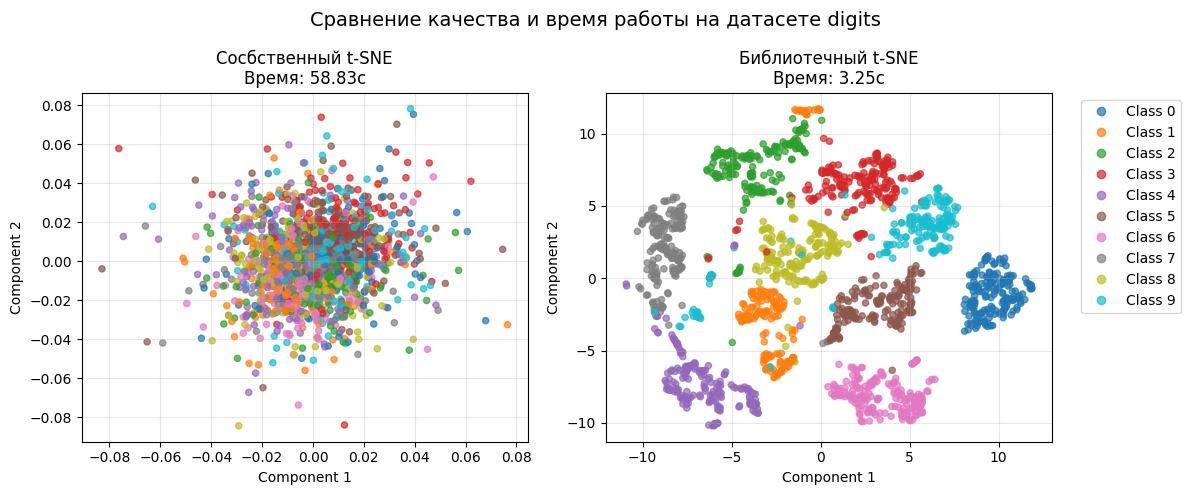

In [ ]:
# Эксперимент с собственной реализацией
print("Собственная реализация t-SNE на датасете digits")
start_time_custom = time.time()
tsne_custom = tSNE(perplexity=30, max_iter=300, learning_rate=10.0, random_state=42)
Y_custom = tsne_custom.fit_transform(X_d_scaled)
time_custom = time.time() - start_time_custom

print(f"Время выполнения: {time_custom:.2f} сек")

# Эксперимент с библиотечной реализацией
print("\nБиблиотечная реализация t-SNE на датасете digits")
start_time_lib = time.time()
tsne_lib = TSNE(n_components=2, perplexity=30, n_iter=300,
                random_state=42, init='random', learning_rate='auto')
Y_lib = tsne_lib.fit_transform(X_d_scaled)
time_lib = time.time() - start_time_lib

print(f"Время выполнения: {time_lib:.2f} сек")
print(f"KL divergence: {tsne_lib.kl_divergence_:.4f}")

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Собственная реализация
axes[0].scatter(Y_custom[:, 0], Y_custom[:, 1], c=y_d, cmap='tab10', alpha=0.7, s=20)
axes[0].set_title(f'Сосбственный t-SNE\nВремя: {time_custom:.2f}с')
axes[0].set_xlabel('Component 1')
axes[0].set_ylabel('Component 2')
axes[0].grid(True, alpha=0.3)

# Библиотечная реализация
scatter = axes[1].scatter(Y_lib[:, 0], Y_lib[:, 1], c=y_d, cmap='tab10', alpha=0.7, s=20)
axes[1].set_title(f'Библиотечный t-SNE\nВремя: {time_lib:.2f}с')
axes[1].set_xlabel('Component 1')
axes[1].set_ylabel('Component 2')
axes[1].grid(True, alpha=0.3)

# Легенда
handles, labels = scatter.legend_elements()
plt.legend(handles, [f'Class {i}' for i in range(10)],
           bbox_to_anchor=(1.05, 1), loc='upper left')

plt.suptitle('Сравнение качества и время работы на датасете digits', fontsize=14)
plt.tight_layout()
plt.show()


Как можно заметить, на большом датасете более заметна разница между сосбтвенной реализацией t-SNE и библиотечной.

Во-первых, библиотечная реализация демонстрирует более качественное разбиенение точек на кластеры, в то время как на левом графике (собственный t-SNE) мы наблюдаем большую скученность точек в центре, которую сложно разделить на кластеры.

Во-вторых, библиотечная реализация оказалась в 18 раз быстрее (58.83 vs 3.25).

Проведем аналогичные эксперименты, как в прошлой задаче, на большом датасете digits.

In [ ]:
# Параметры для экспериментов
perplexities = [5, 15, 30, 50]
early_exaggerations = [4, 12, 24, 50]
exaggerations = [1, 4, 12, 24]
initializations = ['random', 'pca']
dof_values = [0.5, 1.0, 2.0]

Iteration    0: Cost: 8.057939, Grad norm: 0.000683, LR: 9.900000
Iteration  100: Cost: 8.057182, Grad norm: 0.001335, LR: 3.642022
Iteration  200: Cost: 8.055927, Grad norm: 0.002184, LR: 2.206229


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Iteration    0: Cost: 6.507410, Grad norm: 0.000490, LR: 9.900000
Iteration  100: Cost: 6.507069, Grad norm: 0.000847, LR: 3.642022
Iteration  200: Cost: 6.506590, Grad norm: 0.001329, LR: 2.206229


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Iteration    0: Cost: 5.527222, Grad norm: 0.000426, LR: 9.900000
Iteration  100: Cost: 5.526987, Grad norm: 0.000676, LR: 3.642022
Iteration  200: Cost: 5.526694, Grad norm: 0.001025, LR: 2.206229


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Iteration    0: Cost: 4.809633, Grad norm: 0.000385, LR: 9.900000
Iteration  100: Cost: 4.809451, Grad norm: 0.000575, LR: 3.642022
Iteration  200: Cost: 4.809247, Grad norm: 0.000844, LR: 2.206229


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


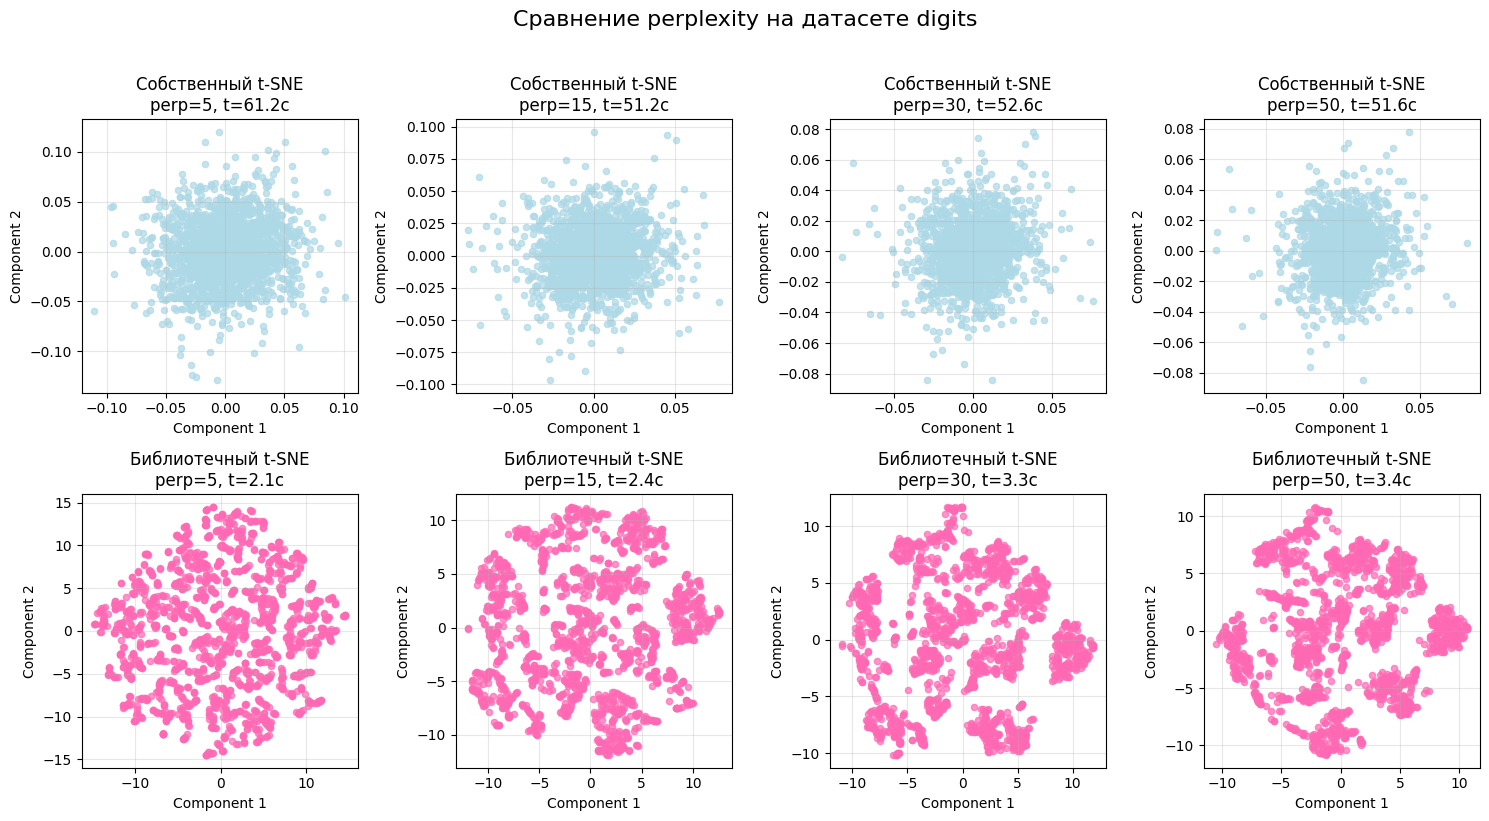

In [ ]:
results_digits = {
    'perplexity': {'custom': {}, 'library': {}}
    }

times_digits = {
    'perplexity': {'custom': {}, 'library': {}}
    }
# Perplexity
for perplexity in perplexities:
    # Собственная реализация
    start_time = time.time()
    tsne_custom = tSNE(perplexity=perplexity, max_iter=300, random_state=42, learning_rate=10.0)
    Y_custom = tsne_custom.fit_transform(X_d_scaled)
    custom_time = time.time() - start_time

    results_digits['perplexity']['custom'][perplexity] = Y_custom
    times_digits['perplexity']['custom'][perplexity] = custom_time

    # Библиотечная реализация
    start_time = time.time()
    tsne_lib = TSNE(n_components=2, perplexity=perplexity, n_iter=300, random_state=42, init='random', learning_rate='auto')
    Y_lib = tsne_lib.fit_transform(X_d_scaled)
    lib_time = time.time() - start_time

    results_digits['perplexity']['library'][perplexity] = Y_lib
    times_digits['perplexity']['library'][perplexity] = lib_time

# Визуализация perplexity
fig, axes = plt.subplots(2, len(perplexities), figsize=(15, 8))

for idx, perplexity in enumerate(perplexities):
    # Сосбтвенный t-SNE
    ax = axes[0, idx]
    Y_custom = results_digits['perplexity']['custom'][perplexity]
    t_custom = times_digits['perplexity']['custom'][perplexity]

    ax.scatter(Y_custom[:, 0], Y_custom[:, 1], alpha=0.7, s=20, color = 'lightblue')
    ax.set_title(f'Собственный t-SNE\nperp={perplexity}, t={t_custom:.1f}с')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.grid(True, alpha=0.3)

    # Библиотечный t-SNE
    ax = axes[1, idx]
    Y_lib = results_digits['perplexity']['library'][perplexity]
    t_lib = times_digits['perplexity']['library'][perplexity]

    scatter = ax.scatter(Y_lib[:, 0], Y_lib[:, 1], alpha=0.7, s=20, color = 'hotpink')
    ax.set_title(f'Библиотечный t-SNE\nperp={perplexity}, t={t_lib:.1f}с')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.grid(True, alpha=0.3)

plt.suptitle('Сравнение perplexity на датасете digits', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


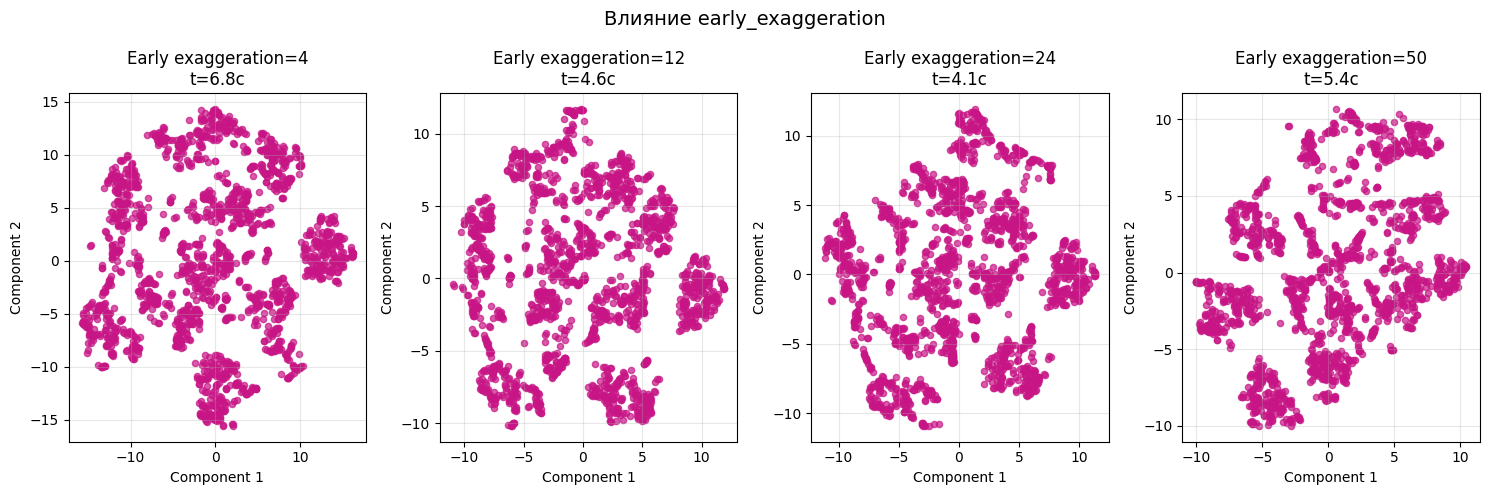

In [ ]:
# Early_exaggeration
results_digits['early_exaggeration'] = {}
times_digits['early_exaggeration'] = {}

for early_exagg in early_exaggerations:
    start_time = time.time()

    tsne_lib = TSNE(n_components=2, perplexity=30, early_exaggeration=early_exagg, n_iter=300, random_state=42, init='random', learning_rate='auto')

    Y_lib = tsne_lib.fit_transform(X_d_scaled)
    lib_time = time.time() - start_time

    results_digits['early_exaggeration'][early_exagg] = Y_lib
    times_digits['early_exaggeration'][early_exagg] = lib_time

# Визуализация early_exaggeration
fig, axes = plt.subplots(1, len(early_exaggerations), figsize=(15, 5))

for idx, early_exagg in enumerate(early_exaggerations):
    ax = axes[idx]
    Y_lib = results_digits['early_exaggeration'][early_exagg]
    t_lib = times_digits['early_exaggeration'][early_exagg]

    scatter = ax.scatter(Y_lib[:, 0], Y_lib[:, 1], alpha=0.7, s=20, color='mediumvioletred')
    ax.set_title(f'Early exaggeration={early_exagg}\nt={t_lib:.1f}с')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.grid(True, alpha=0.3)

plt.suptitle('Влияние early_exaggeration', fontsize=14)
plt.tight_layout()
plt.show()


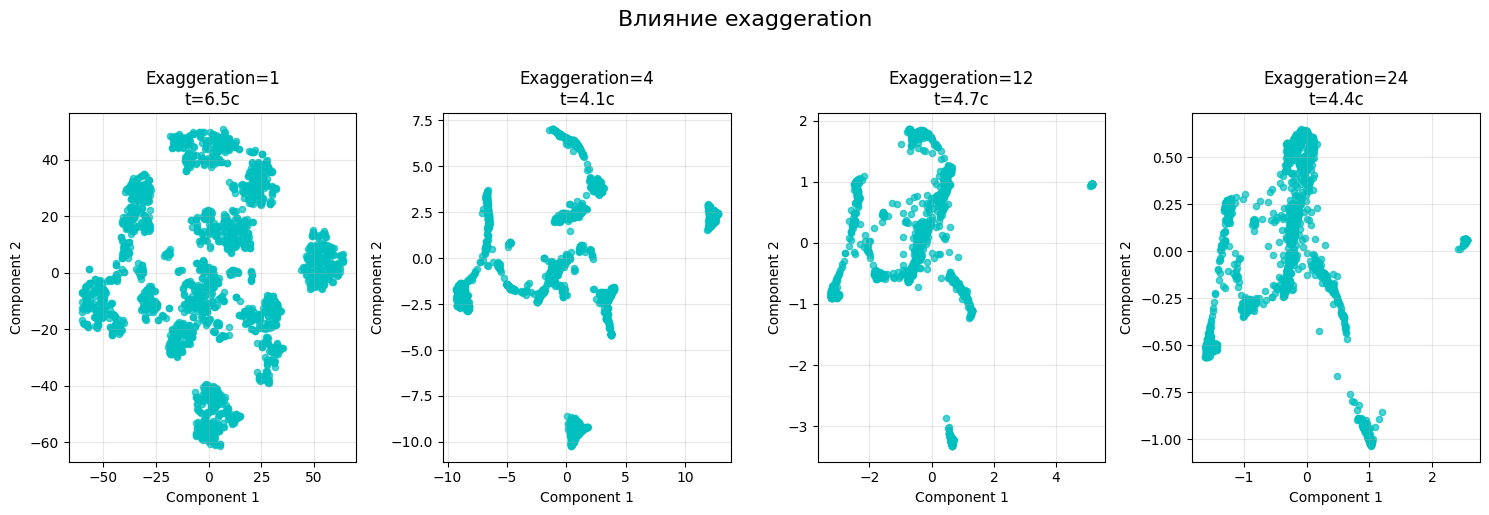

In [ ]:
# Exaggeration
results_digits['exaggeration'] = {}
times_digits['exaggeration'] = {}

for exagg in exaggerations:
    start_time = time.time()

    tsne_lib = openTSNE(n_components=2, perplexity=19, n_iter=300, random_state=42, initialization ='random', learning_rate='auto', exaggeration = exagg)

    Y_lib = tsne_lib.fit(X_d_scaled)
    lib_time = time.time() - start_time

    results_digits['exaggeration'][exagg] = Y_lib
    times_digits['exaggeration'][exagg] = lib_time

# Визуализация exaggeration
fig, axes = plt.subplots(1, len(exaggerations), figsize=(15, 5))

for idx, exagg in enumerate(exaggerations):
    ax = axes[idx]
    Y = results_digits['exaggeration'][exagg]
    t = times_digits['exaggeration'][exagg]

    scatter = ax.scatter(Y[:, 0], Y[:, 1], alpha=0.7, s=20, color='c')
    ax.set_title(f'Exaggeration={exagg}\nt={t:.1f}с')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.grid(True, alpha=0.3)

plt.suptitle('Влияние exaggeration', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

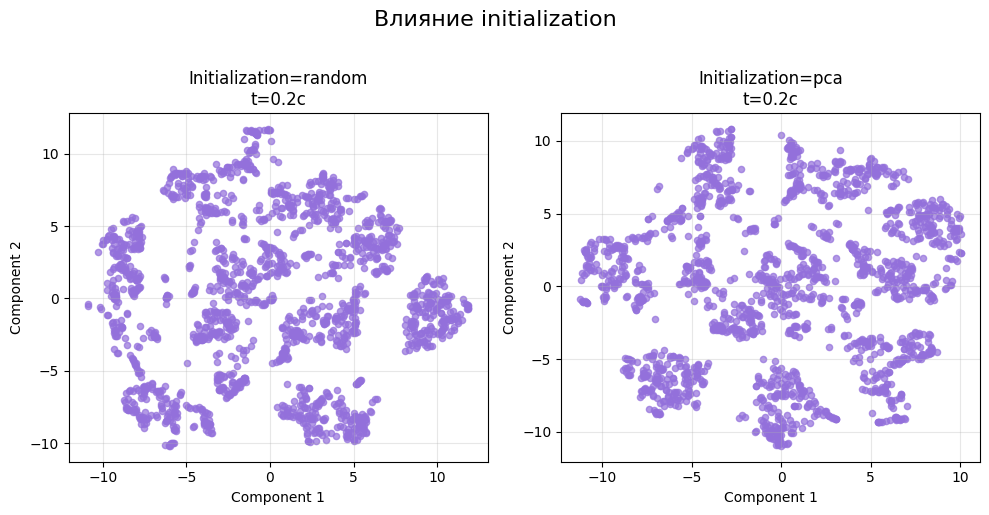

In [ ]:
# Initialization
results_digits['initialization'] = {}
times_digits['initialization'] = {}

for init in initializations:
    start_time = time.time()
    tsne_lib = TSNE(n_components=2, perplexity=30, max_iter=300,random_state=42, init=init, learning_rate='auto')
    Y_lib = tsne_lib.fit_transform(X_d_scaled)
    lib_time = time.time() - start_time

    results_digits['initialization'][init] = Y_lib
    times_digits['initialization'][init] = lib_time

# Визуализация initialization
fig, axes = plt.subplots(1, len(initializations), figsize=(10, 5))

for idx, init in enumerate(initializations):
    ax = axes[idx]
    Y_lib = results_digits['initialization'][init]
    t_lib = times_digits['initialization'][init]

    scatter = ax.scatter(Y_lib[:, 0], Y_lib[:, 1], alpha=0.7, s=20, color='mediumpurple')
    ax.set_title(f'Initialization={init}\nt={t:.1f}с')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.grid(True, alpha=0.3)

plt.suptitle('Влияние initialization', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

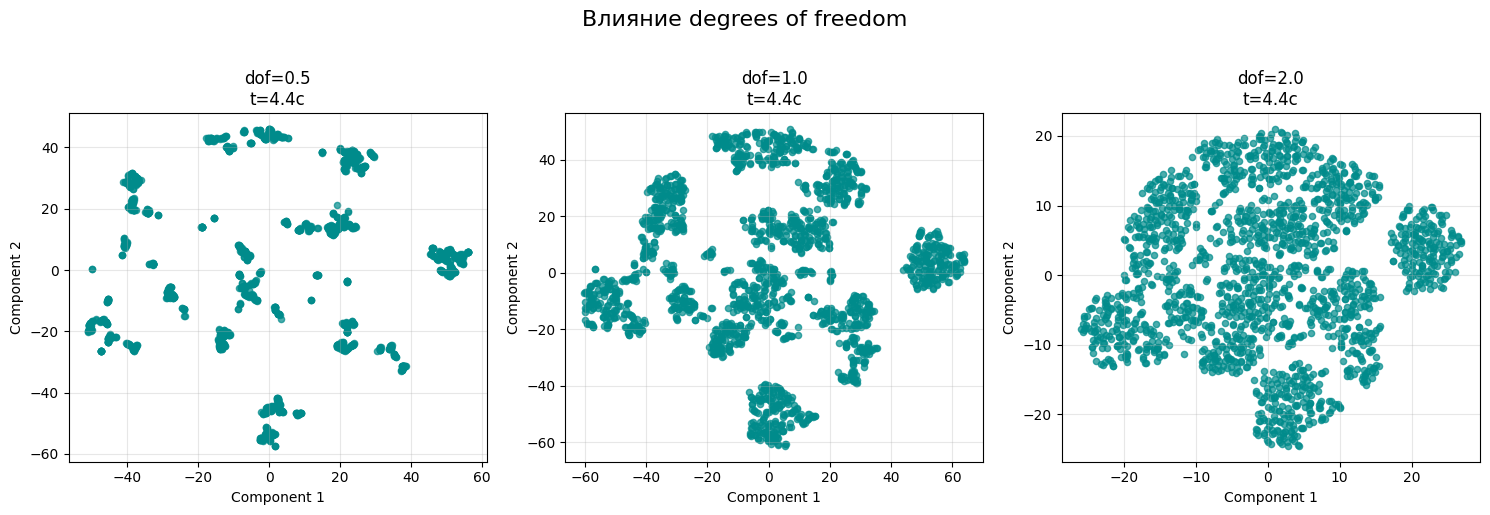

In [ ]:
# dof
results_digits['dof'] = {}
times_digits['dof'] = {}
for dof in dof_values:
    start_time = time.time()

    tsne_lib = openTSNE(n_components=2, perplexity=19, n_iter=300, random_state=42, initialization ='random', learning_rate='auto', dof=dof)

    Y_lib = tsne_lib.fit(X_d_scaled)
    lib_time = time.time() - start_time

    results_digits['dof'][dof] = Y_lib
    times_digits['dof'][dof] = lib_time

# Визуализация dof
fig, axes = plt.subplots(1, len(dof_values), figsize=(15, 5))

for idx, dof in enumerate(dof_values):
    ax = axes[idx]
    Y_lib = results_digits['dof'][dof]
    t_lib = times_digits['dof'][dof]

    scatter = ax.scatter(Y_lib[:, 0], Y_lib[:, 1], alpha=0.7, s=20, color='darkcyan')
    ax.set_title(f'dof={dof}\nt={t:.1f}с')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.grid(True, alpha=0.3)

plt.suptitle('Влияние degrees of freedom', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

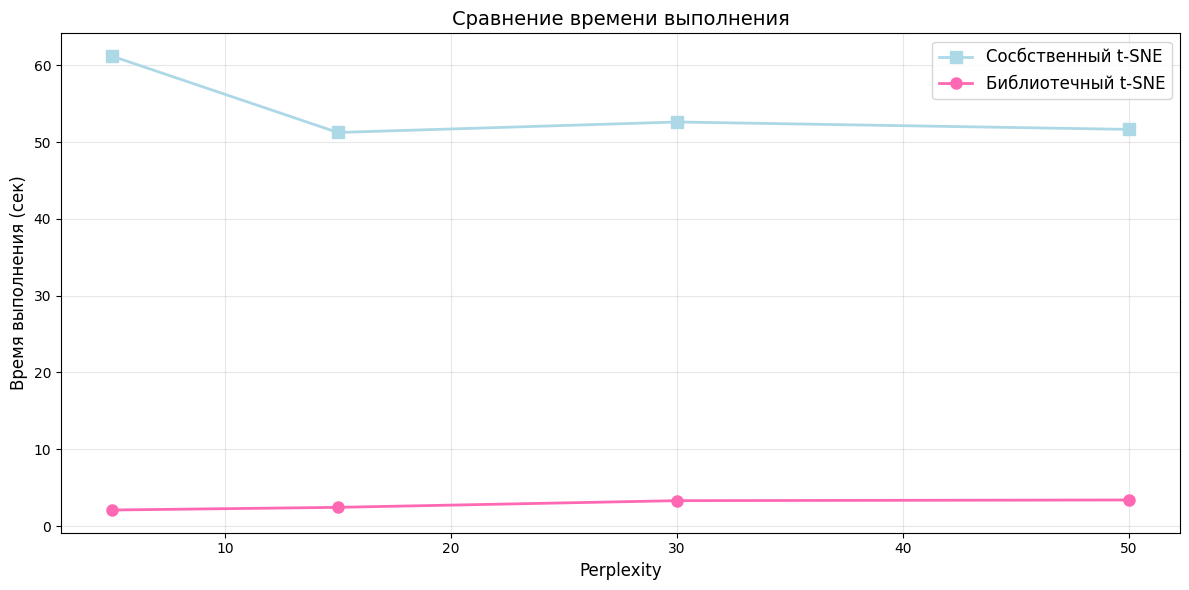

In [ ]:
# Сравнение времени выполнения
plt.figure(figsize=(12, 6))

# Время самостоятельно реализованного t-SNE
custom_times = [times_digits['perplexity']['custom'][p] for p in perplexities]

# Время библиотечного t-SNE
lib_times = [times_digits['perplexity']['library'][p] for p in perplexities]

plt.plot(perplexities, custom_times, 's-', label='Сосбственный t-SNE', linewidth=2, markersize=8, color='lightblue')
plt.plot(perplexities, lib_times, 'o-', label='Библиотечный t-SNE', linewidth=2, markersize=8, color='hotpink')

plt.xlabel('Perplexity', fontsize=12)
plt.ylabel('Время выполнения (сек)', fontsize=12)
plt.title('Сравнение времени выполнения', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Вывод:**

Проведя эксперименты на большом датасете digits можно отметить, что библиотечная реализация t-SNE демонстрирует более качественные результаты: лучшее разбиение на кластеры, а также более быструю реализацию (в 20-30 раз быстрее).

Так, можно отметить, что библиотечная реализация хорошо работает с большими датасетами, в то время как на маленьких датасетах может быть медленнее из-за накладных расходов, но все еще дает более качественные результаты кластеризации, в отличие от самостоятельной реализации t-SNE, которая имеет больше смысл в акакдемических целях для понимания алгоритма работы.